# Extract the MS2 scan and do signature neutral loss search
- run multiple files
- need to define a precursor target list & scan range (let's just try to do more inclusive one)

In [6]:
# !pip install matplotlib
# !pip install pymzml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 10.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 769.6/769.6 kB 13.5 MB/s eta 0:00:00a 0:00:01


In [7]:
# !pip install pymzml
%matplotlib inline

In [8]:
import numpy as np
from matplotlib import pyplot as plt
import pymzml
import os
import pandas as pd
import sys

In [9]:
sys.path.append('../pyutils/')  # add the second parent directory
from searchMS2 import *

In [10]:
# spectrum.selected_precursors
# [{'mz': 417.320373535156, 'charge': 1, 'precursor id': '2'}]

In [11]:
dir_path = "../../../../MS_MS_raw_mzML/WT_Klof2_C1_RPneg/mzML/"
files_and_dirs = os.listdir(dir_path)

# Get the full path for each file/directory in the list
infiles = [os.path.join(dir_path, file) for file in files_and_dirs]

In [12]:
exps = []
for infile in infiles:
    exps.append(pymzml.run.Reader(infile))

[Warning] Not index found and build_index_from_scratch is False


## Basic information - using the first instance

In [13]:
exp = pymzml.run.Reader(infiles[0])

[Warning] Not index found and build_index_from_scratch is False


In [14]:
# How many spectra
exp.get_spectrum_count()

7267

In [15]:
exp.ms_precisions # ms-level 1: ppm 5; ms-level 2: ppm 20?

{None: 0.0001, 0: 0.0001, 1: 5e-06, 2: 2e-05, 3: 2e-05}

##### summary
- a probably 12 min run (720 secs) for 4008 scans
- 0.17964 second/scan

## Load target list

In [16]:
df_sel = pd.read_csv("./data/input/features_matched2targetPS_M-Honly.csv")

In [17]:
df_sel.head(10)

FTID      formula  neutral_mass short_name
0   F9996  C43H76NO10P    797.520687    PS 37:4
1   F9994  C43H76NO10P    797.520687    PS 37:4
2   F9995  C43H76NO10P    797.520687    PS 37:4
3   F9997  C43H76NO10P    797.520687    PS 37:4
4  F14243  C49H84NO10P    877.583287    PS 43:6
5  F14242  C49H84NO10P    877.583287    PS 43:6
6   F5440  C26H50NO10P    567.317237    PS 20:0
7   F5441  C26H50NO10P    567.317237    PS 20:0
8  F13352  C42H80NO10P    789.551987    PS 36:1
9  F13353  C42H80NO10P    789.551987    PS 36:1

In [18]:
FTIDs = df_sel['FTID'].tolist()

In [19]:
df_feat_annot = pd.read_csv("../../../../asari-output-RPneg/output_asari_project_31312361/Feature_annotation.tsv",
                           sep = '\t', index_col=0)

In [20]:
# Select the desired rows and columns from the DataFrame
subset = df_feat_annot.loc[FTIDs, ['mz', 'rtime', 'apex(scan number)']]
# drop duplicates
subset_dd = subset.drop_duplicates() 
# Convert the subset to a dictionary with row-wise orientation
target_dict = subset_dd.to_dict(orient='index')

In [21]:
list(target_dict.items())[0]

('F9996', {'mz': 796.5134125, 'rtime': 247.5722656, 'apex(scan number)': 1119})

In [22]:
# testing
# target_dict_test = {k:v for k,v in target_dict.items() if k == "F13469"}
# target_dict_test

## get potential precursor from multiple files

In [24]:
res_dict = {}
for exp in exps:
    for k,v in target_dict.items(): # target_dict_test
        spectra = get_potential_precursor_from_exp_filtbyRt(exp, 
                              min_rt_sec = v['rtime']-50, 
                              max_rt_sec = v['rtime']+50, 
                              min_mz = v['mz']-1, 
                              max_mz = v['mz']+1, 
                              ms_level=2)
        res_dict[k] = spectra

[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_index_from_scratch is False
[Warning] Not index found and build_inde

In [25]:
res_dict_clean = {k:v for k,v in res_dict.items() if len(v) != 0}

In [26]:
NL_res_dict = {}
for FTID, spectra in res_dict_clean.items():
    NL_res_dict.update({FTID: search_NL(spectra)})

2.9201080554887433
13.053637047446093
0.586400426408102
2.9201080554887433
13.053637047446093
0.586400426408102
4.322711448247482
6.426616537385589
2.9201080554887433
13.053637047446093
0.586400426408102
4.322711448247482
6.426616537385589
6.426616537385589
11.335728412041172
8.530521626523695
0.11490126997126707
12.73833180479991
6.426616537385589
11.335728412041172
8.530521626523695
0.11490126997126707
12.73833180479991
8.53052162913625
4.322711448247482
0.586400426408102
2.9201080554887433
4.092908908304947
1.5175046627300053
13.43963350117928
1.5175046627300053
13.43963350117928
1.5175046627300053
13.43963350117928
19.7513487685936
3.3916072119255785
0.586400426408102
0.48967689602942216
0.8162029663506362
3.3916072119255785
0.586400426408102
0.48967689602942216
0.8162029663506362
3.3916072119255785
0.586400426408102
0.48967689602942216
0.8162029663506362
3.3916072119255785
0.586400426408102
0.48967689602942216
0.8162029663506362
7.829219930144327
6.9798033149859355
2.9201080554887

In [27]:
NL_res_dict_clean = {k:v for k,v in NL_res_dict.items() if len(v) != 0}

In [39]:
features_wt_matched_df = pd.DataFrame(NL_res_dict_clean.keys())

In [40]:
features_wt_matched_df.to_csv("features_wt_matched_df.csv")

# plot accordingly

In [28]:
NL_res_dict_clean.keys()

dict_keys(['F13352', 'F13353', 'F13354', 'F13182', 'F13181', 'F11501', 'F13468', 'F13469', 'F13470', 'F12028', 'F11746', 'F11747', 'F11749', 'F11748', 'F14612', 'F13804', 'F12087', 'F9864', 'F9861', 'F9862', 'F9863', 'F9865', 'F9866', 'F13364', 'F13367', 'F13365', 'F13366', 'F13368', 'F13184', 'F13185', 'F12902', 'F12903', 'F12926'])

In [29]:
df_sel.index = df_sel['FTID']

In [30]:
df_sel.columns[0:6]

Index(['FTID', 'formula', 'neutral_mass', 'short_name'], dtype='object')

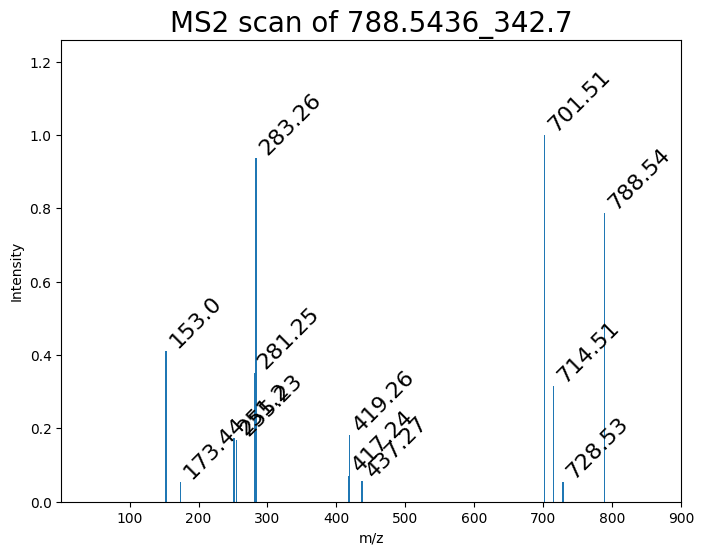

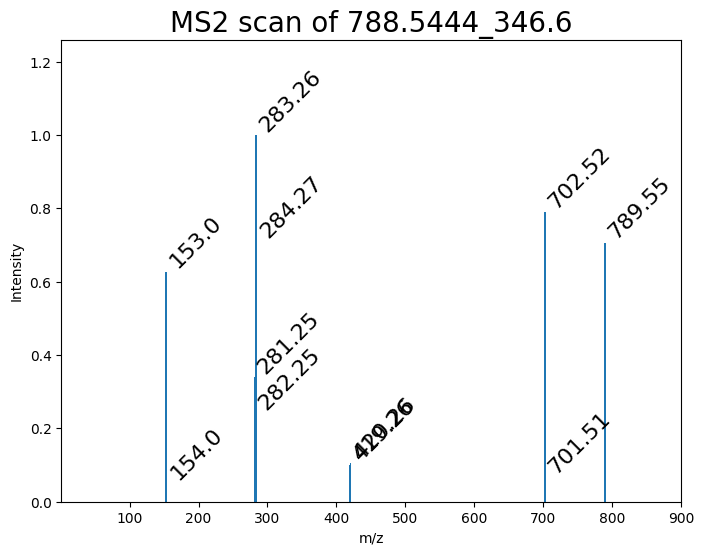

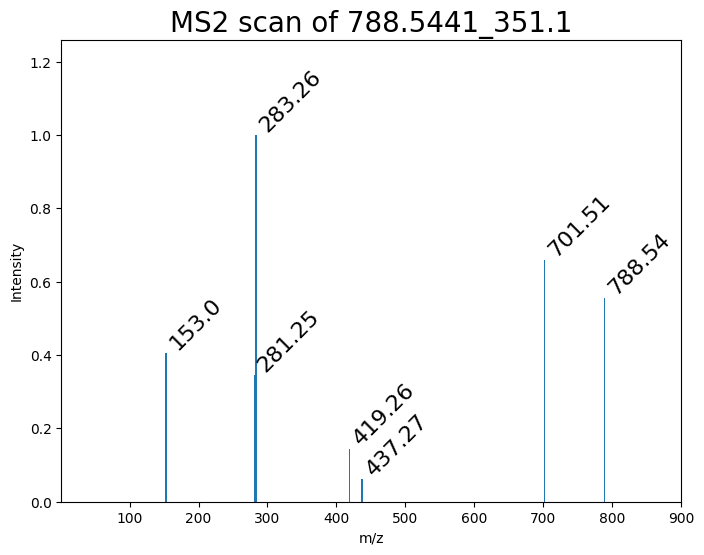

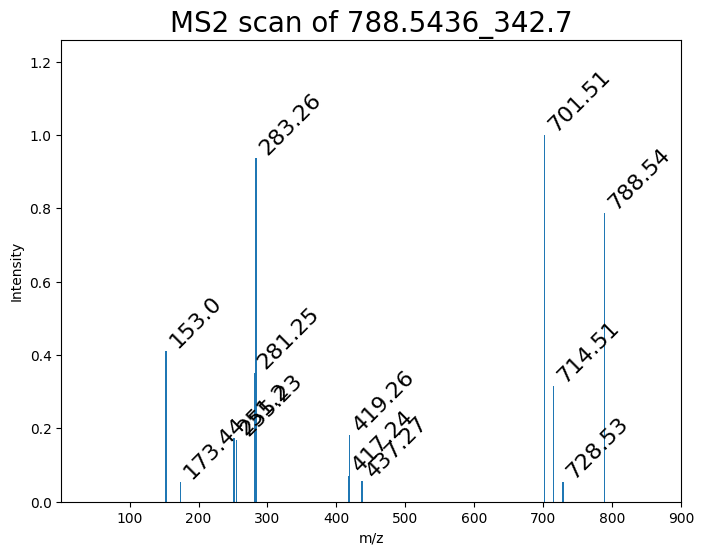

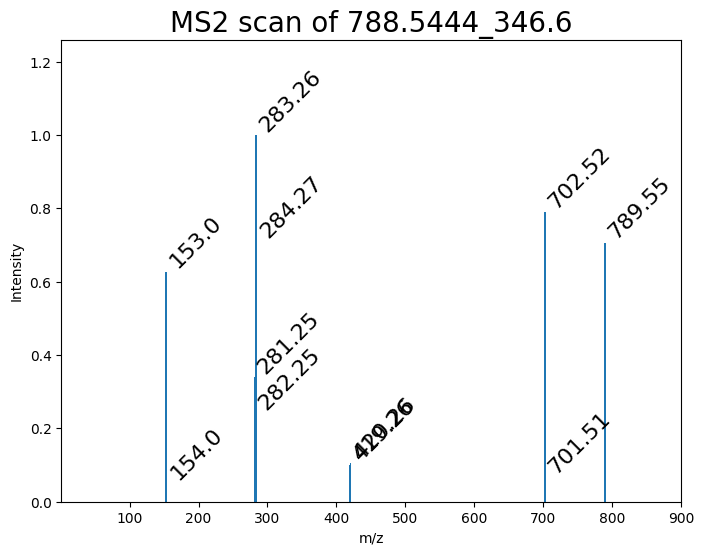

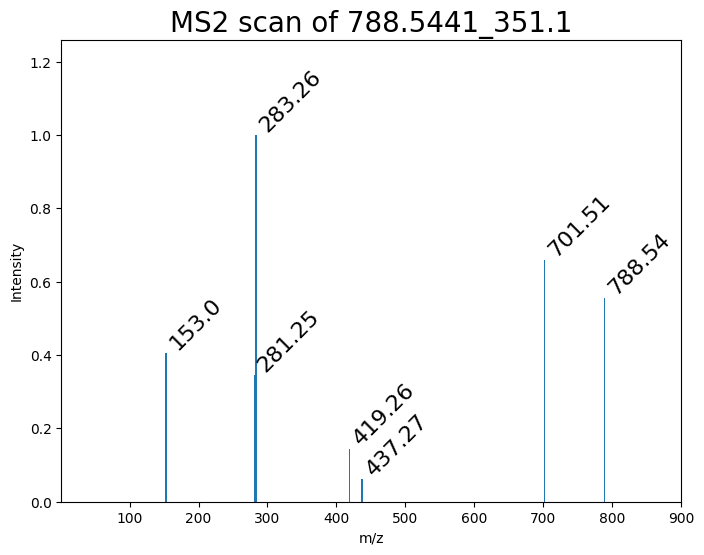

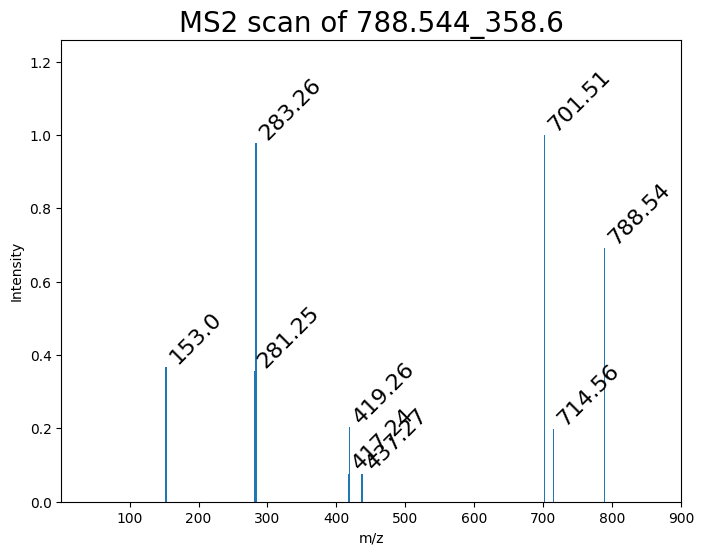

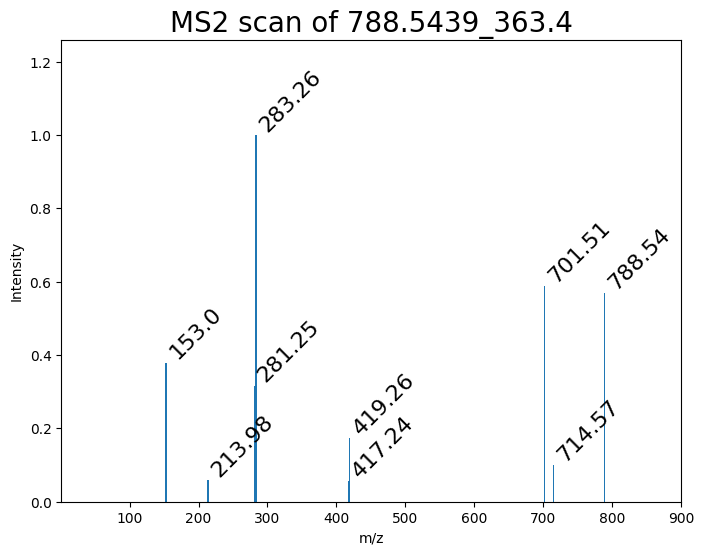

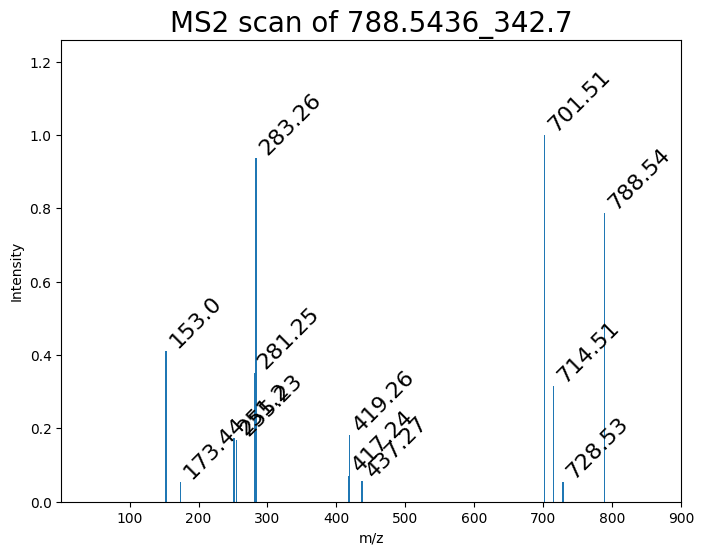

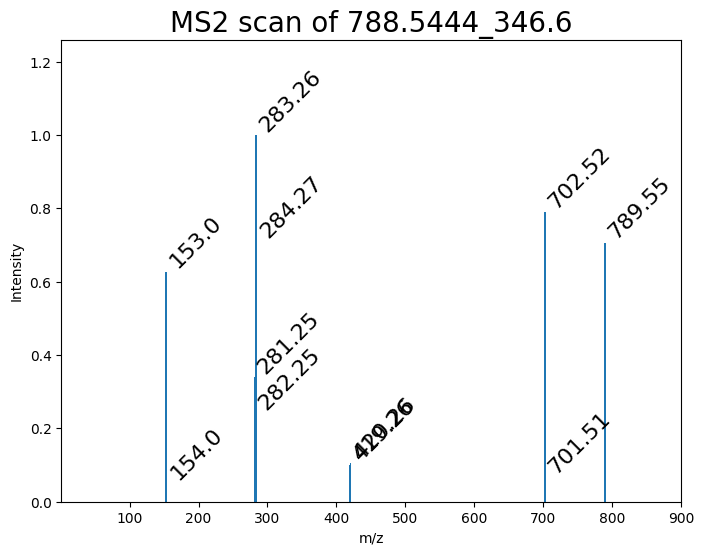

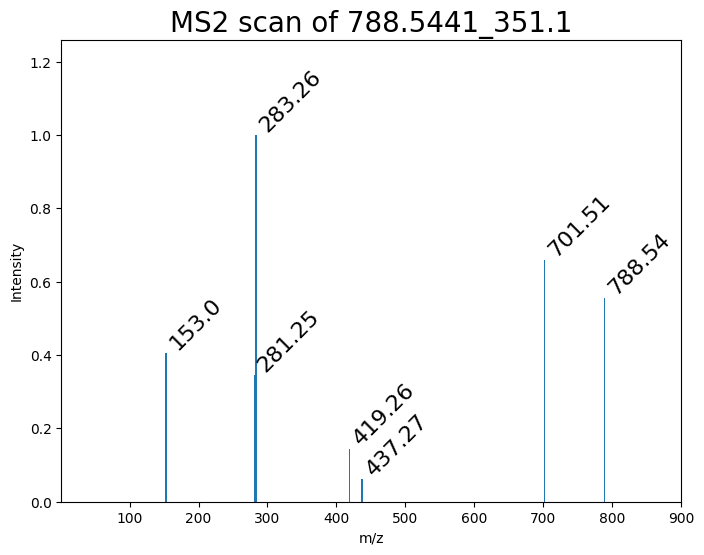

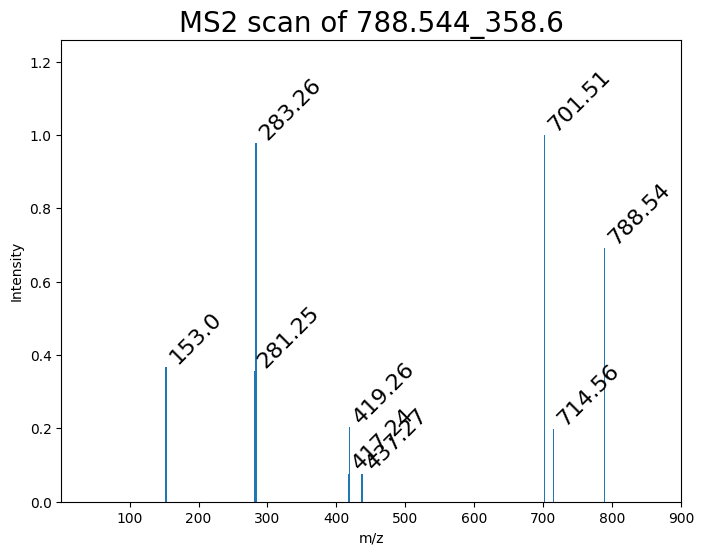

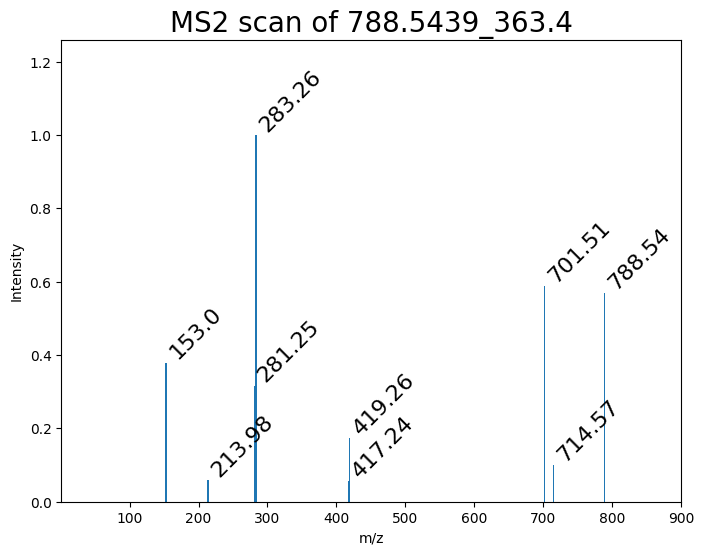

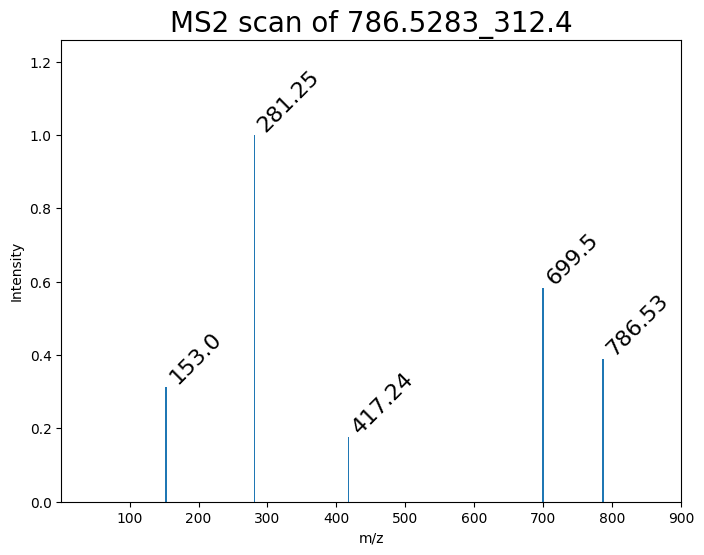

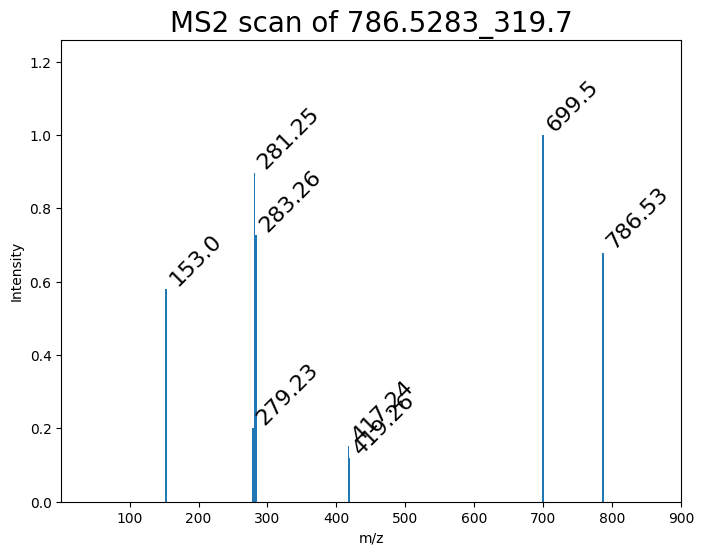

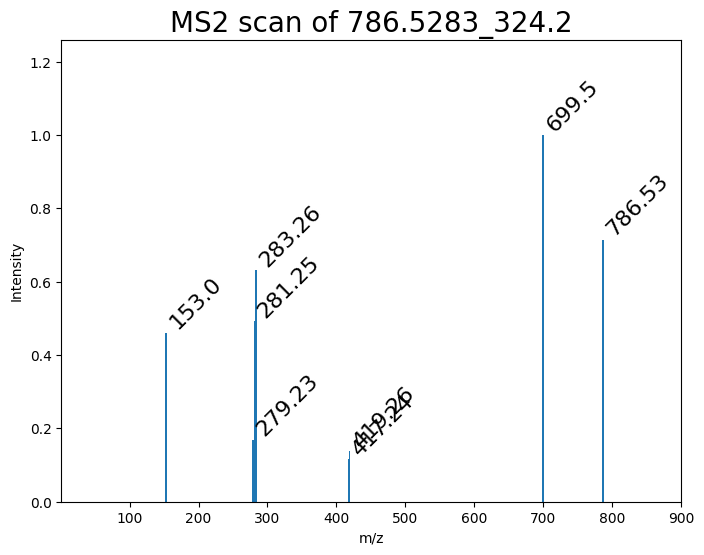

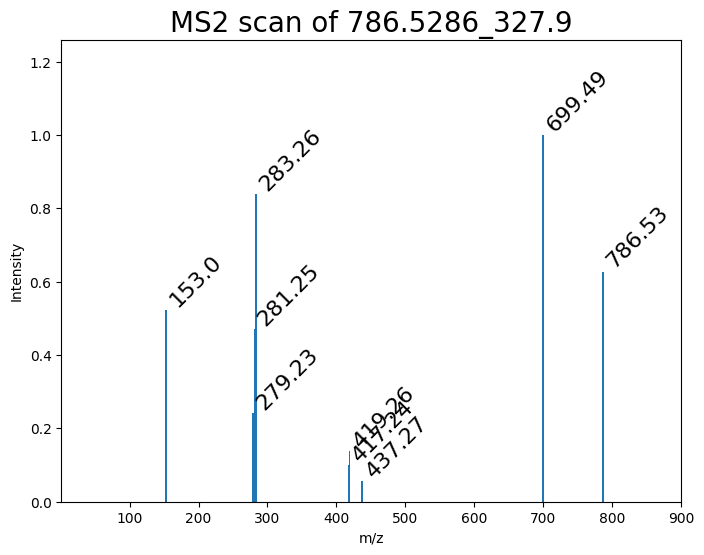

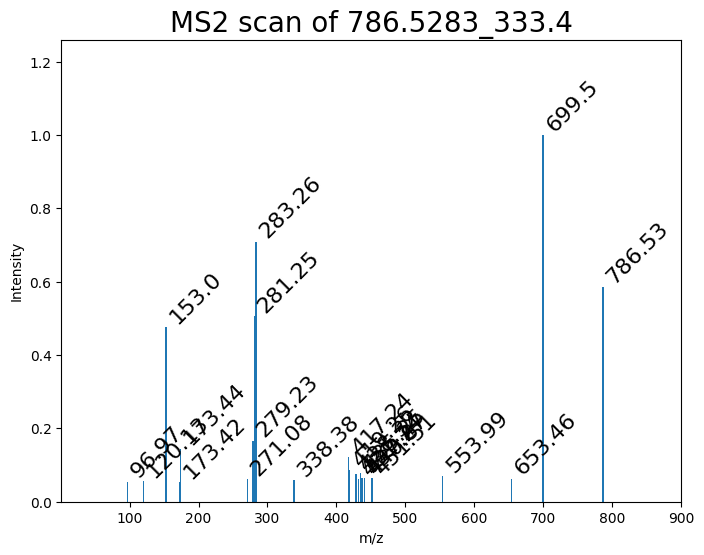

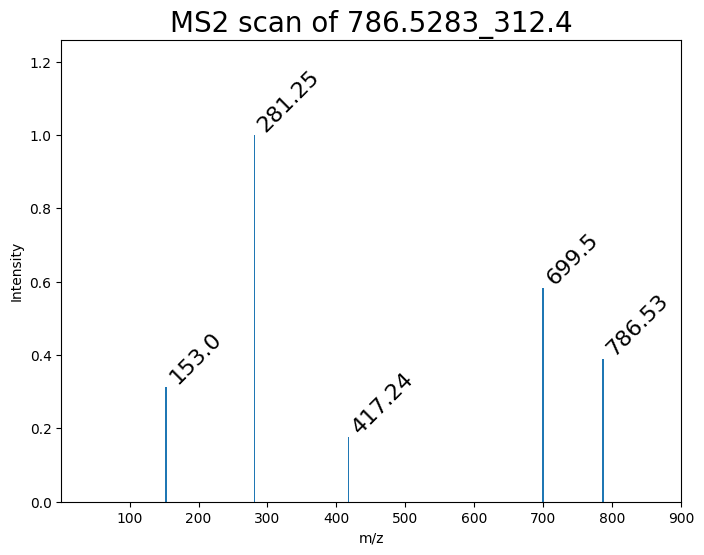

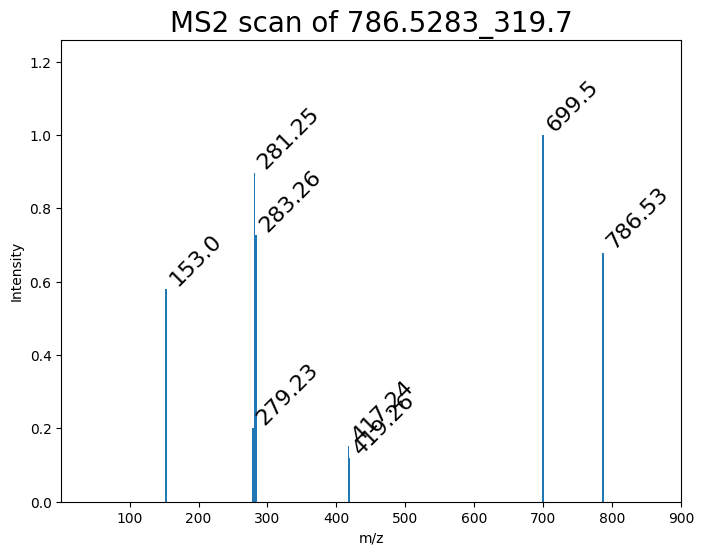

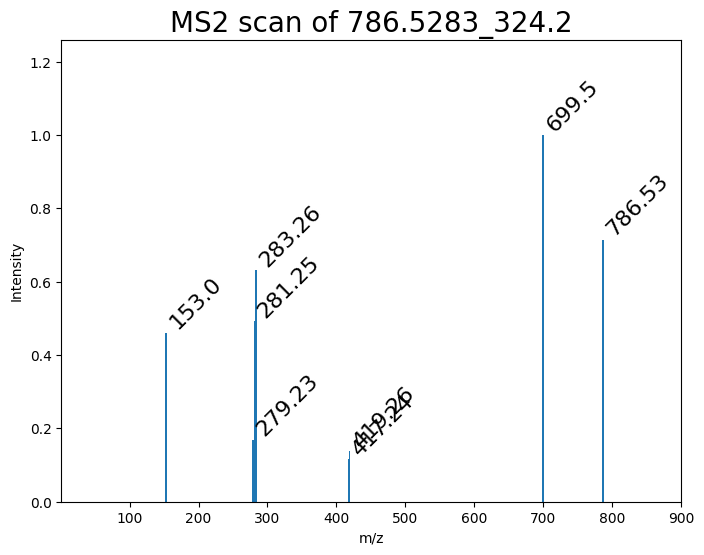

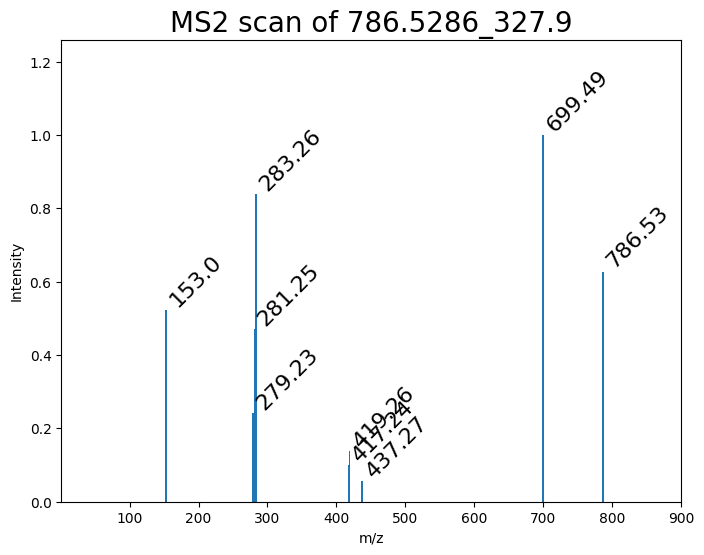

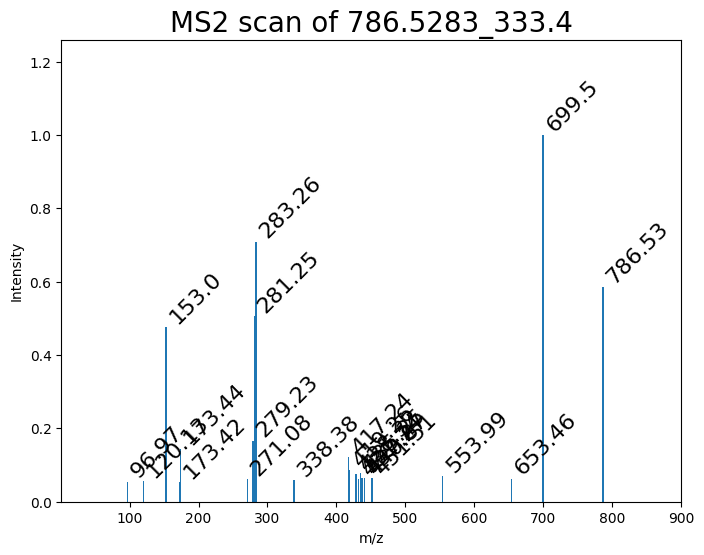

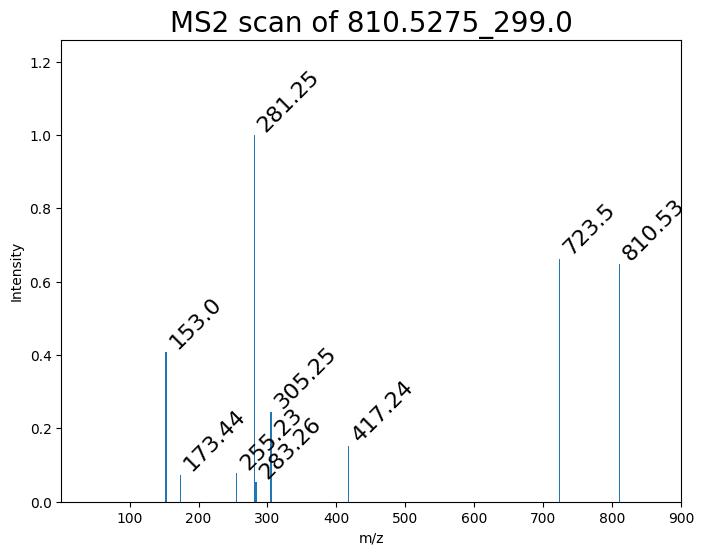

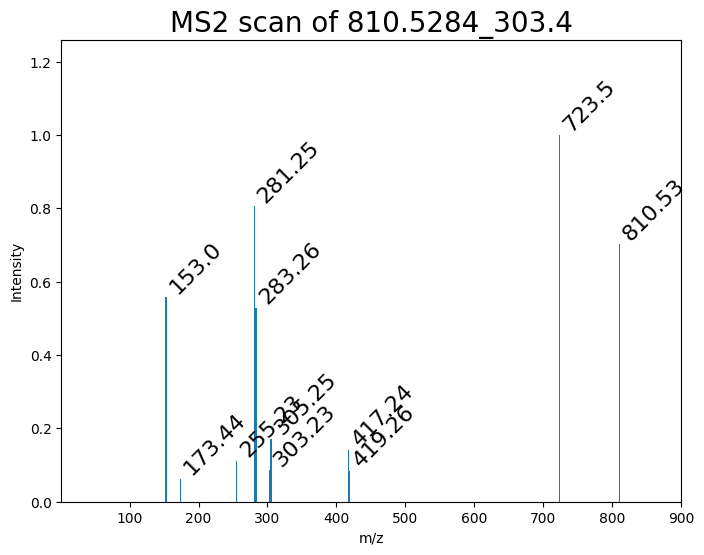

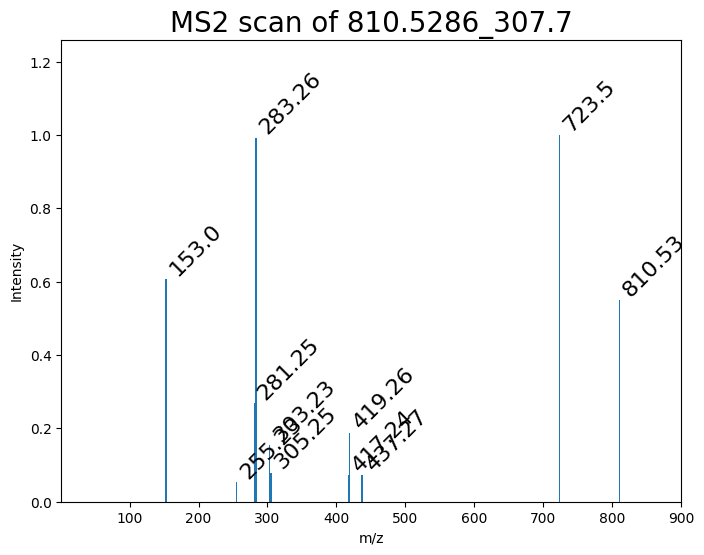

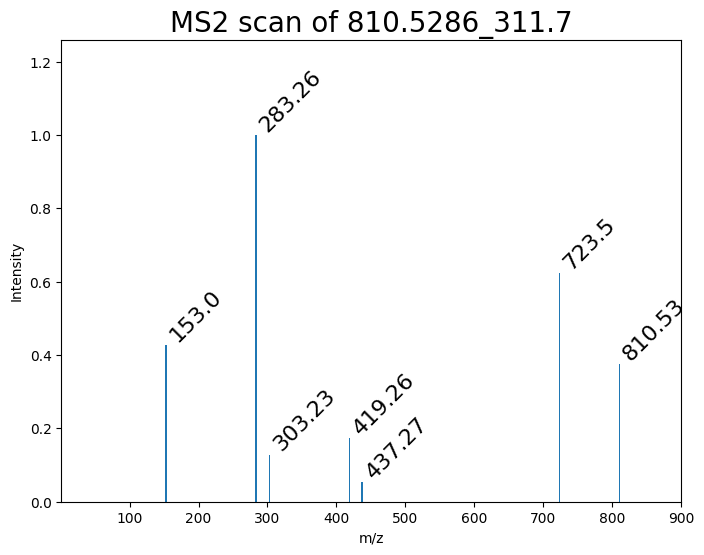

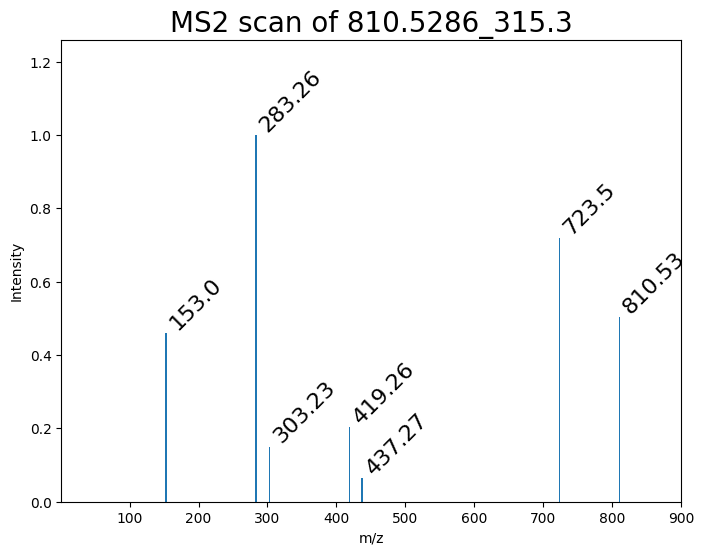

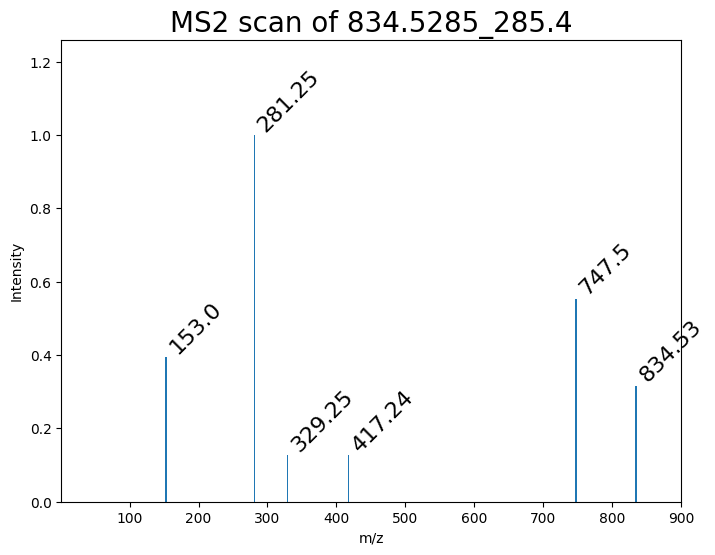

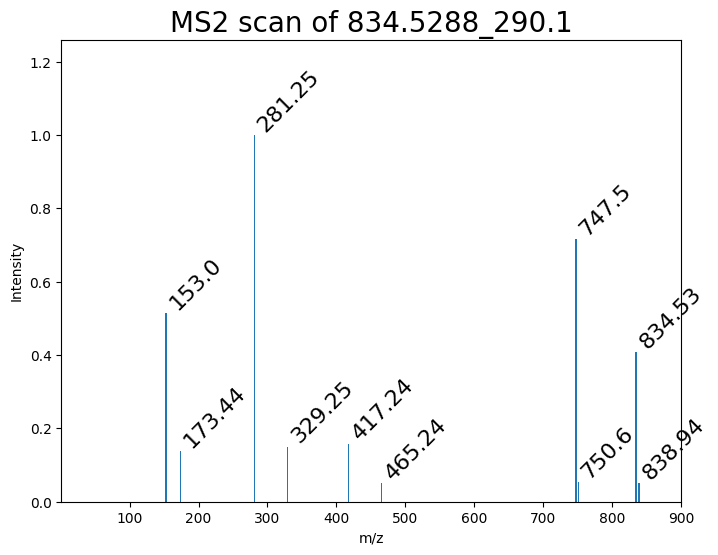

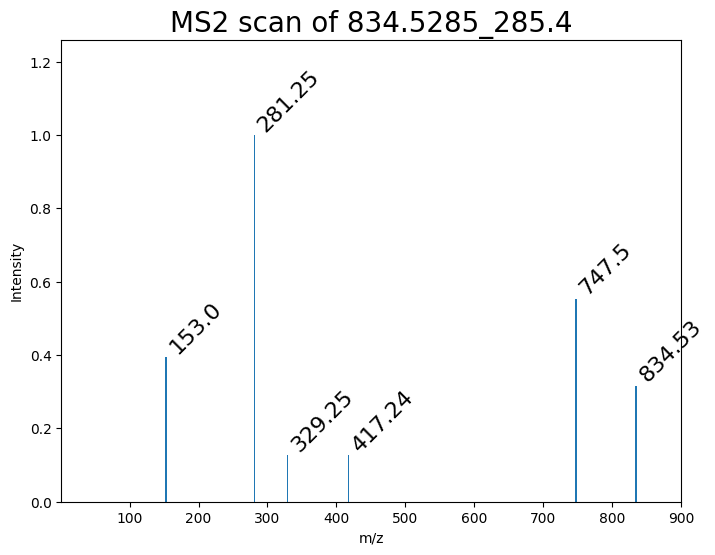

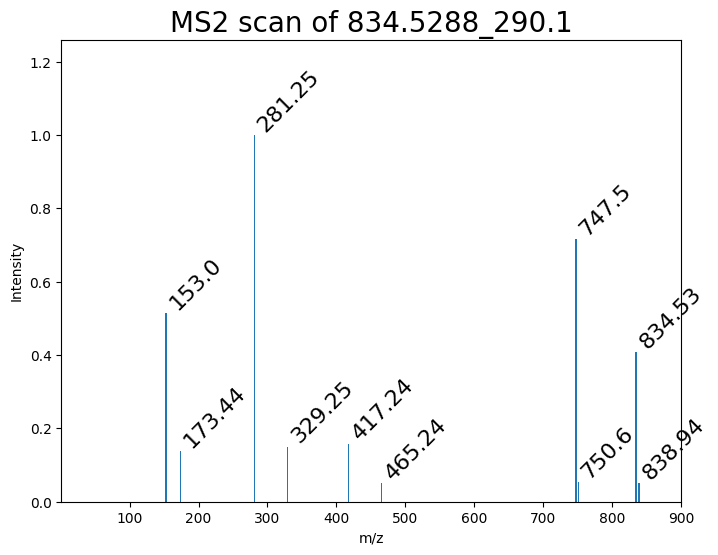

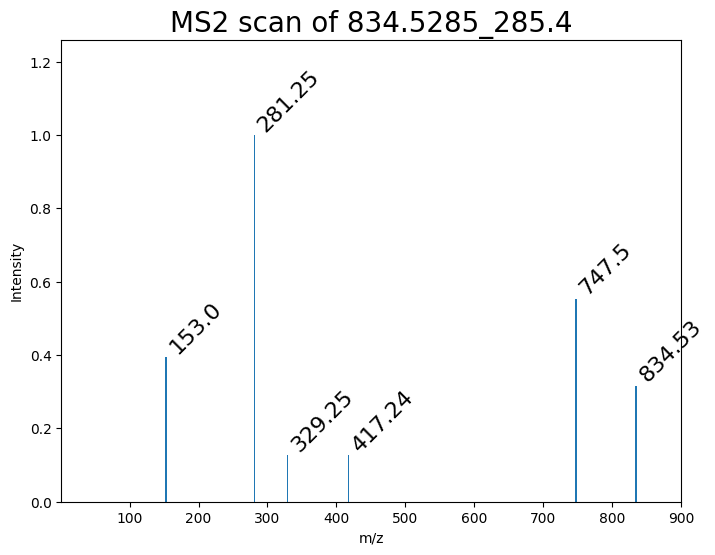

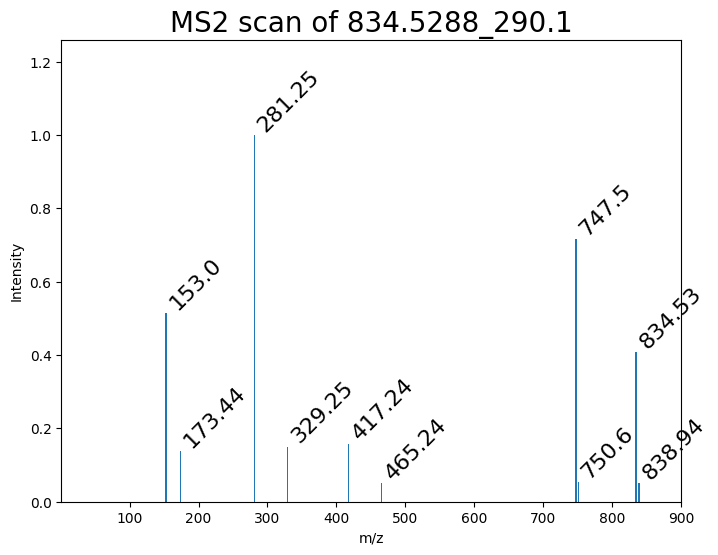

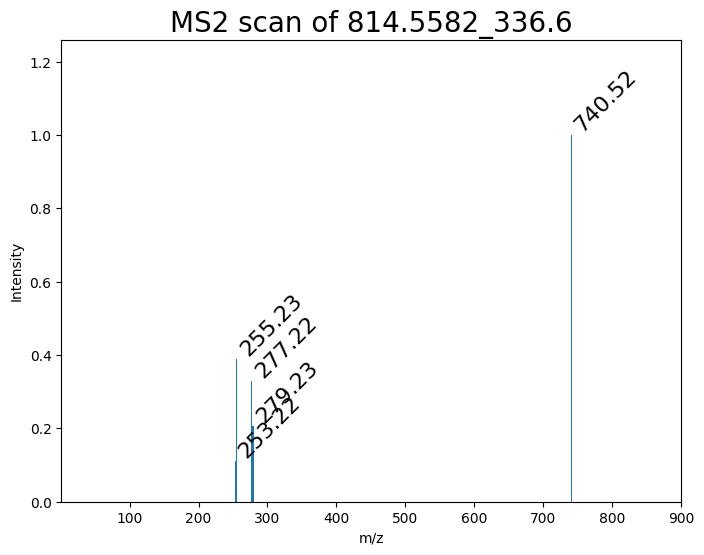

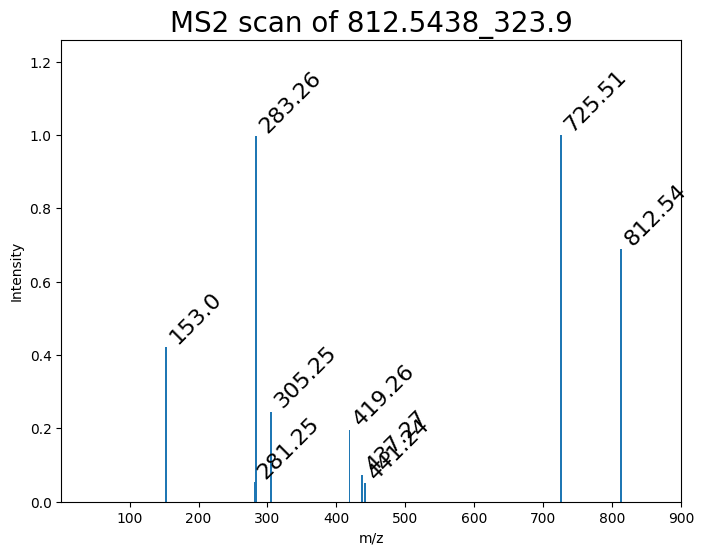

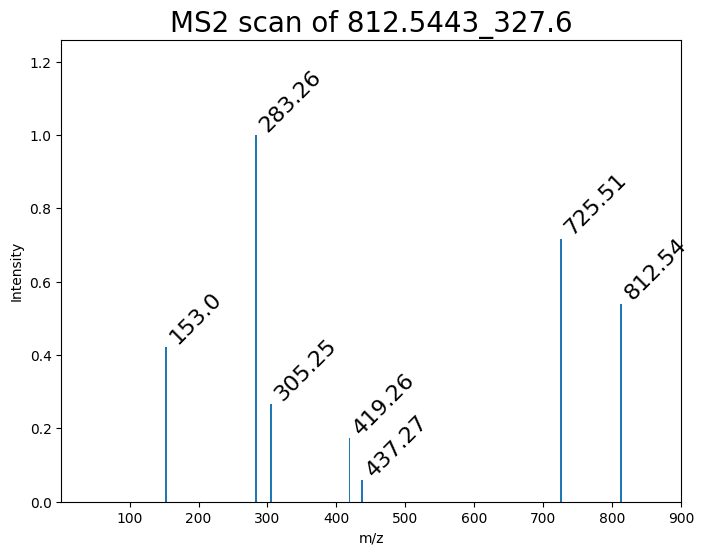

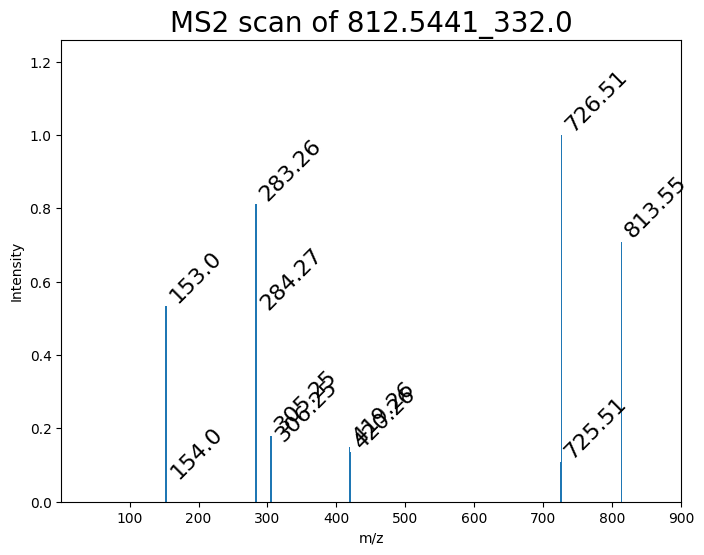

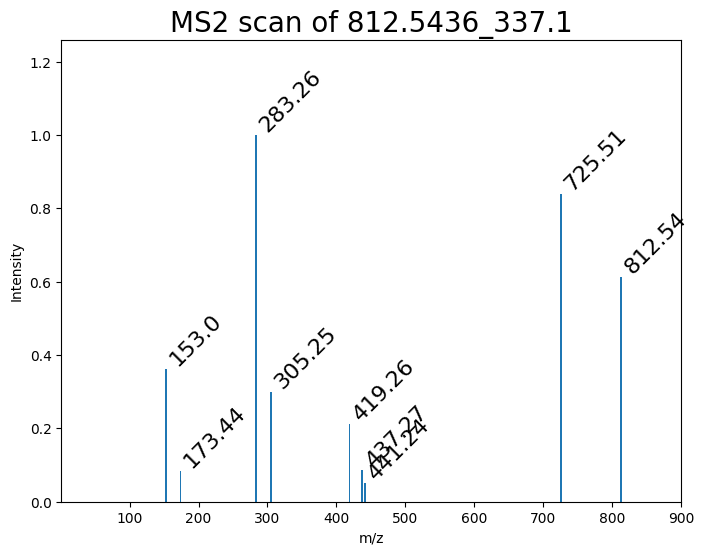

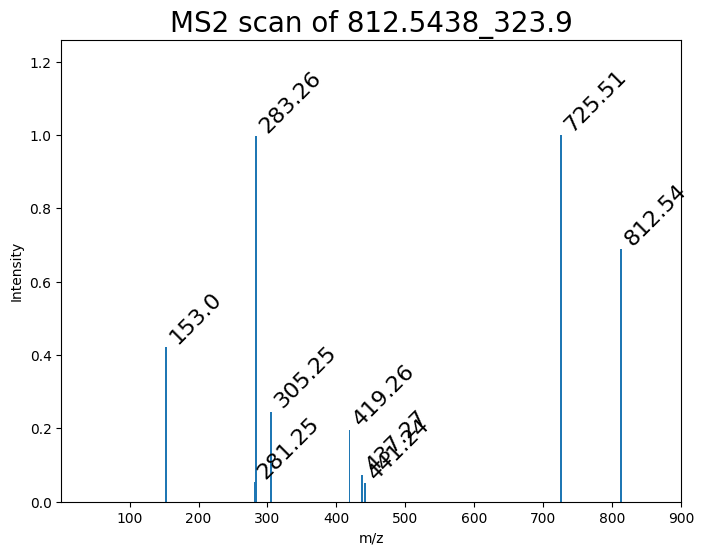

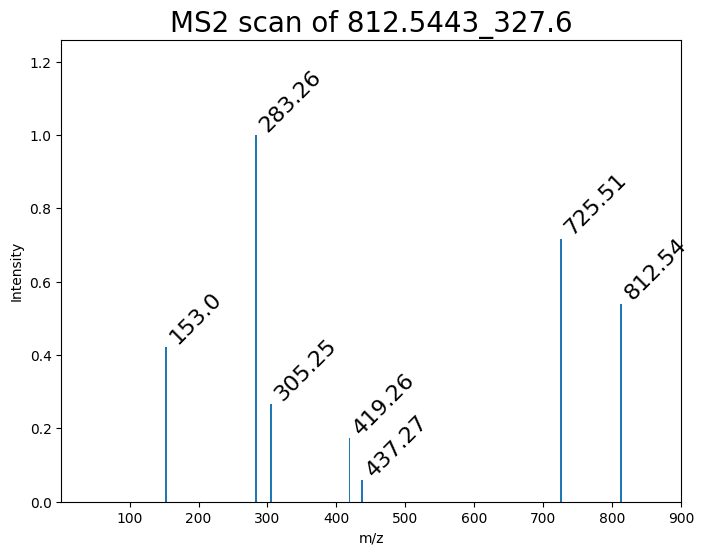

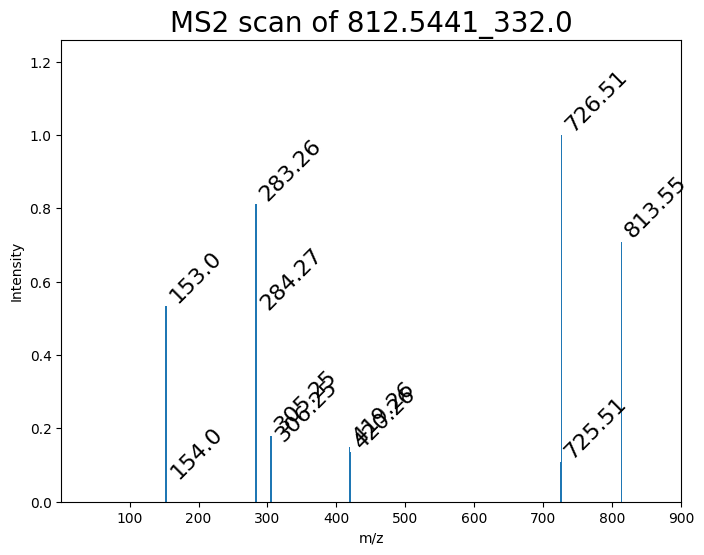

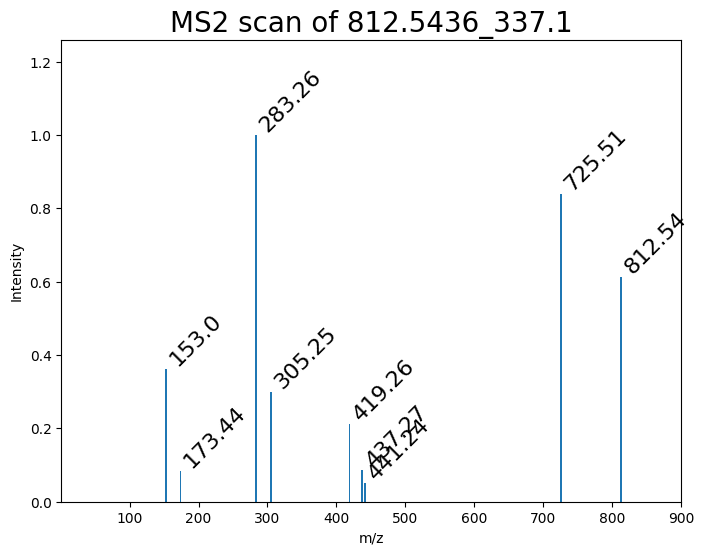

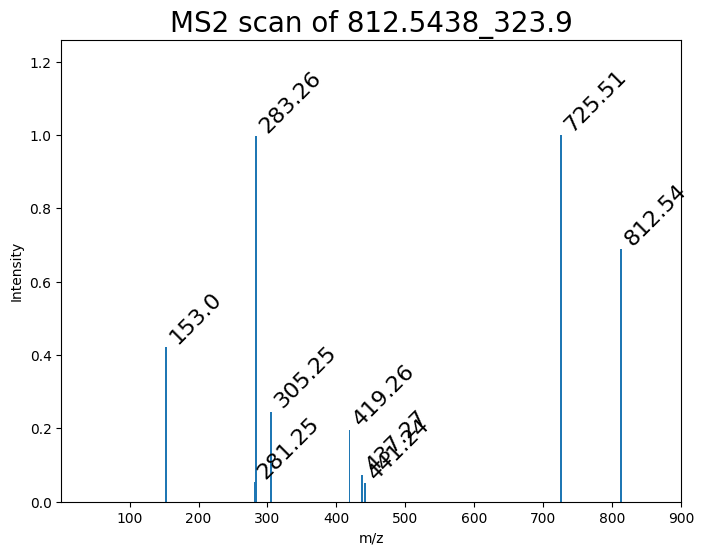

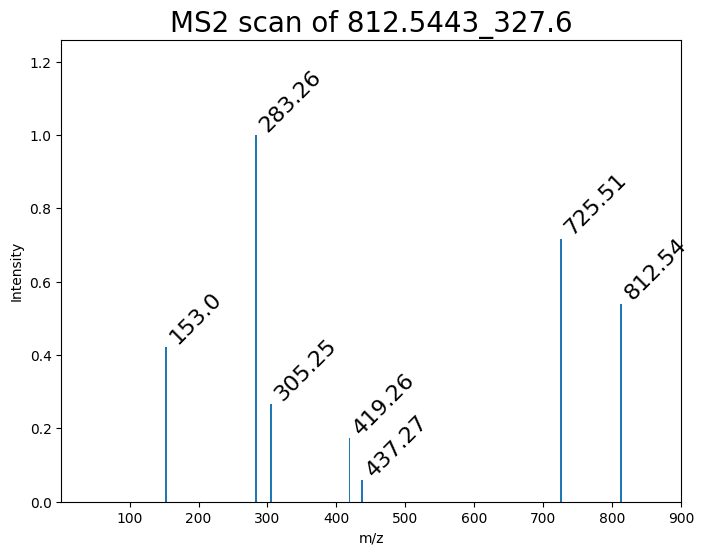

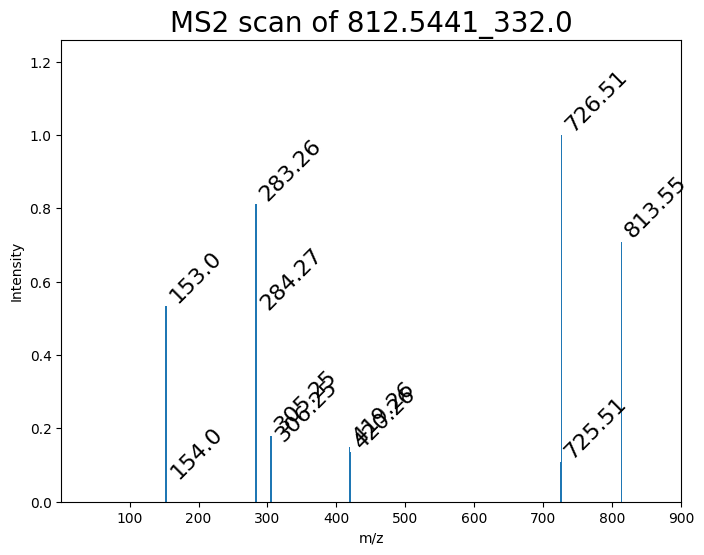

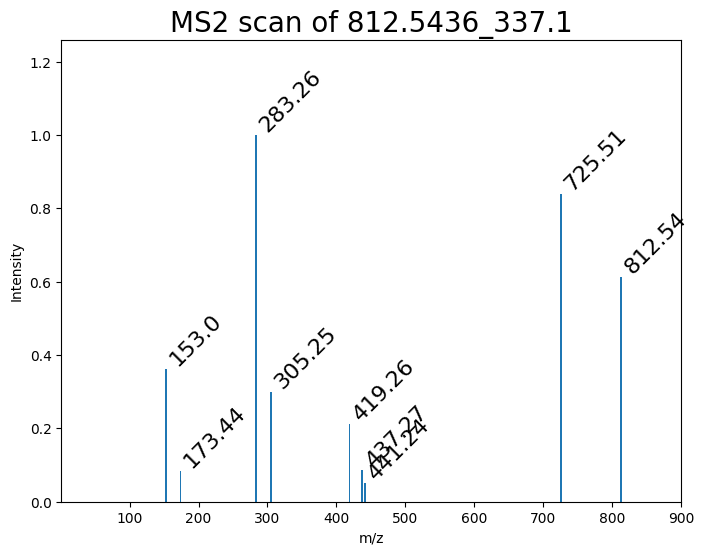

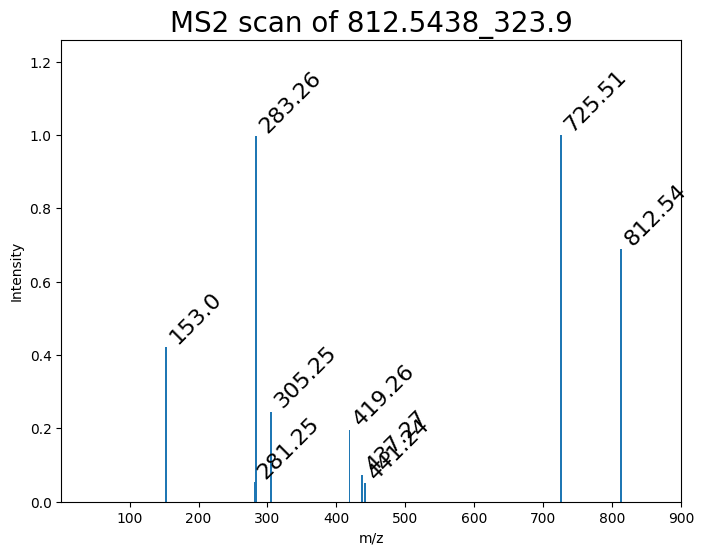

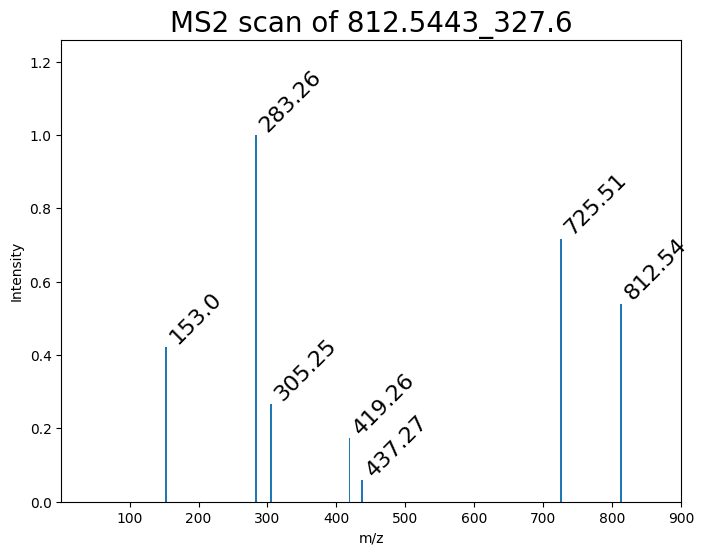

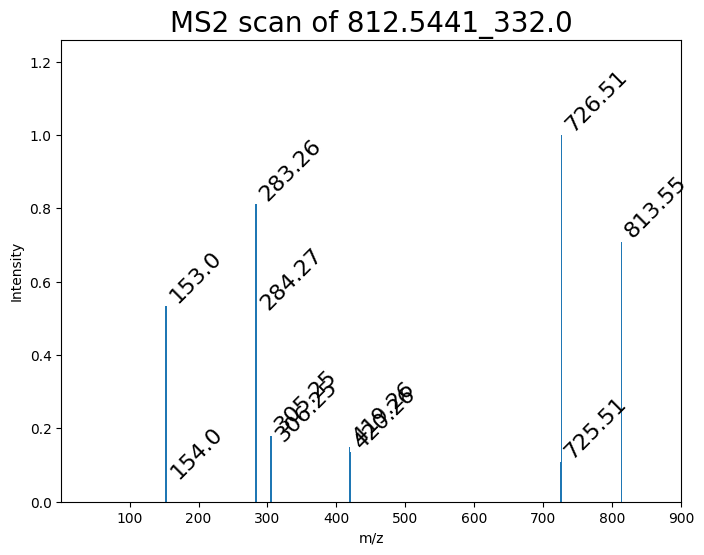

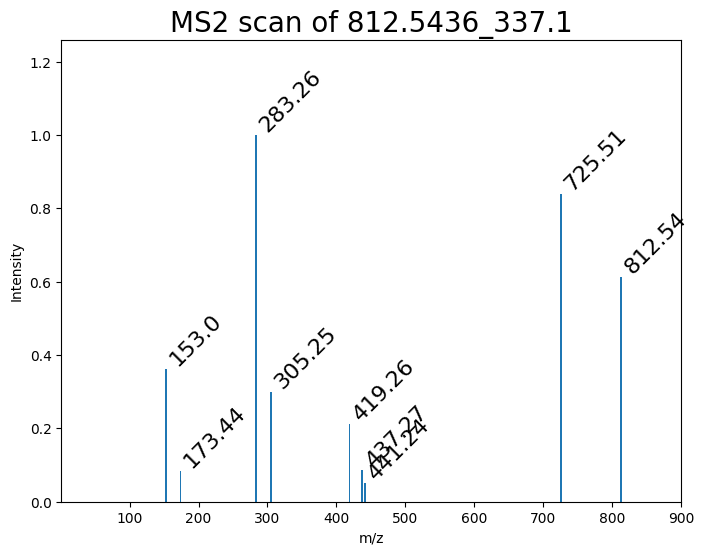

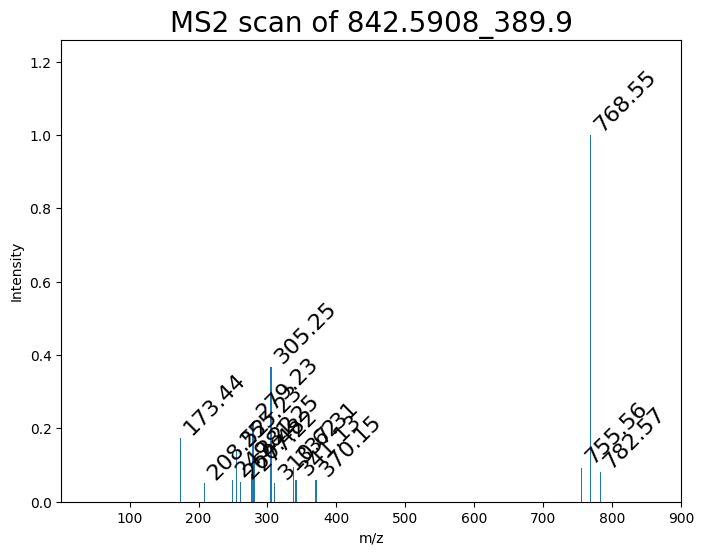

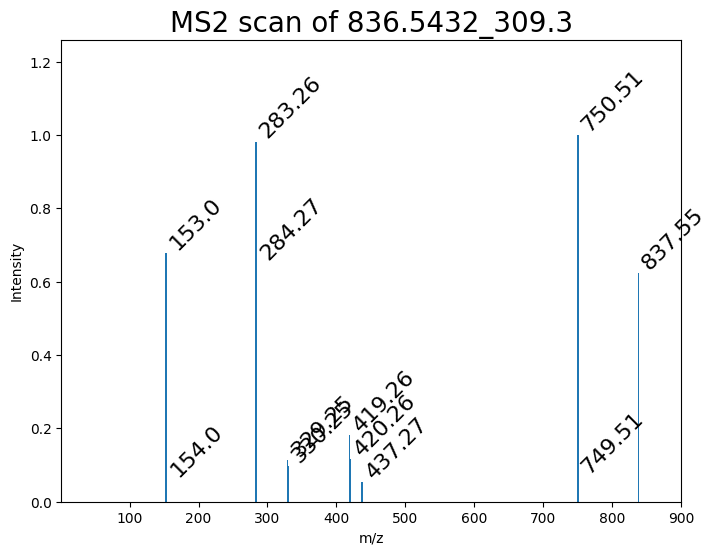

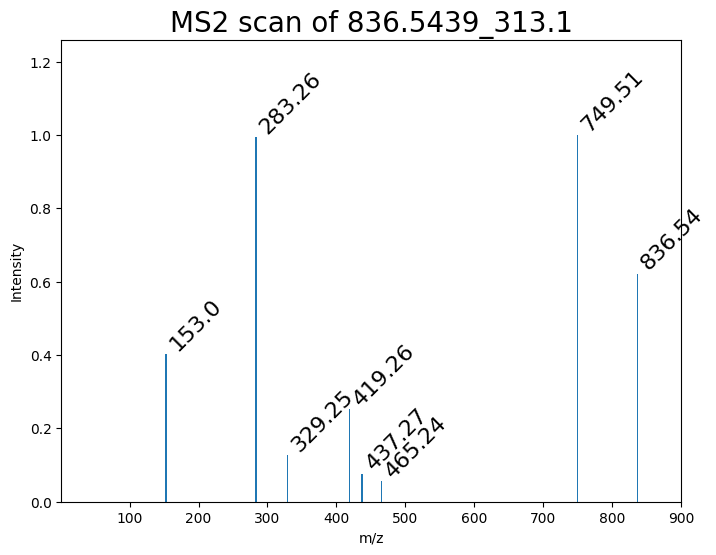

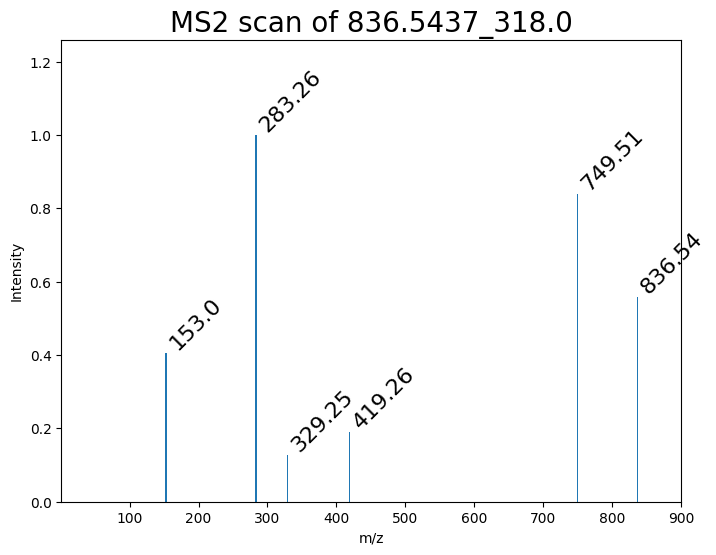

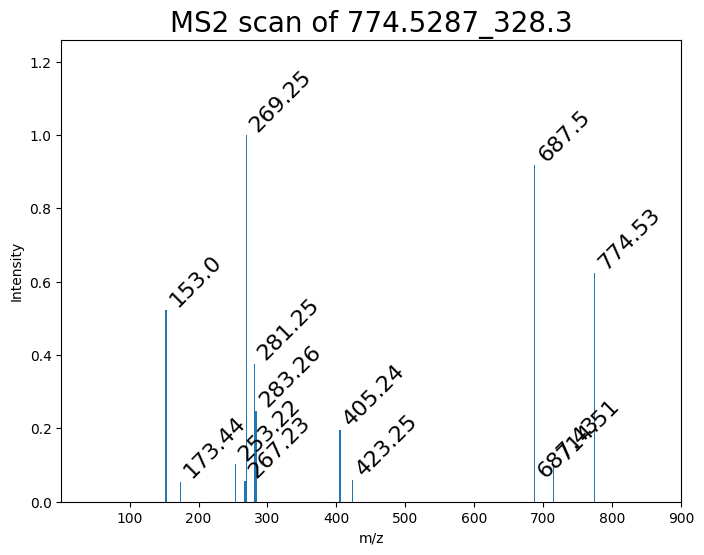

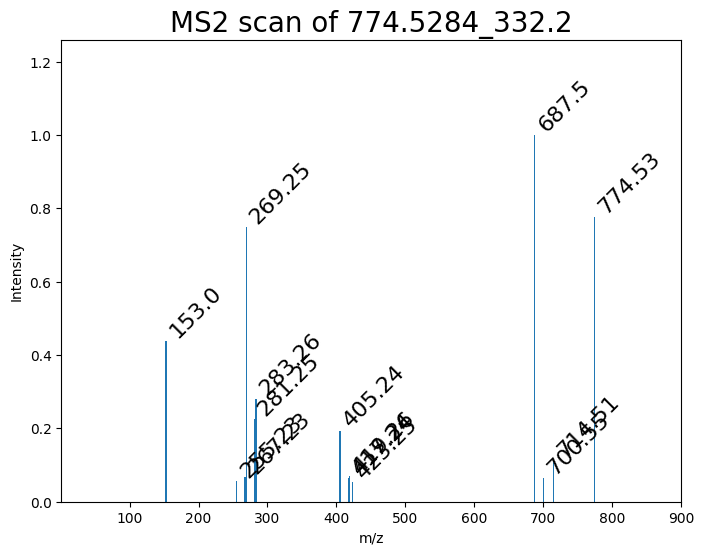

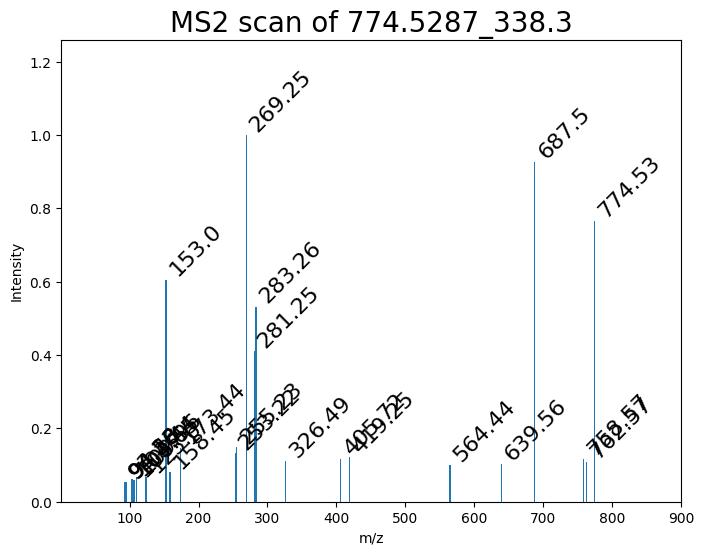

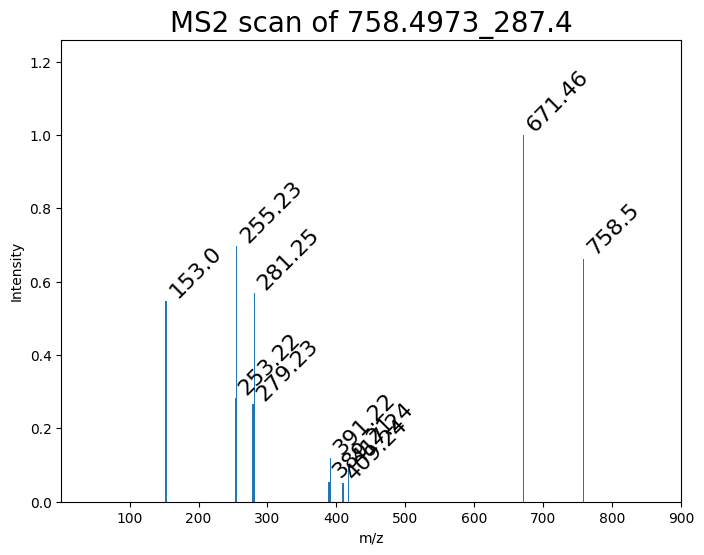

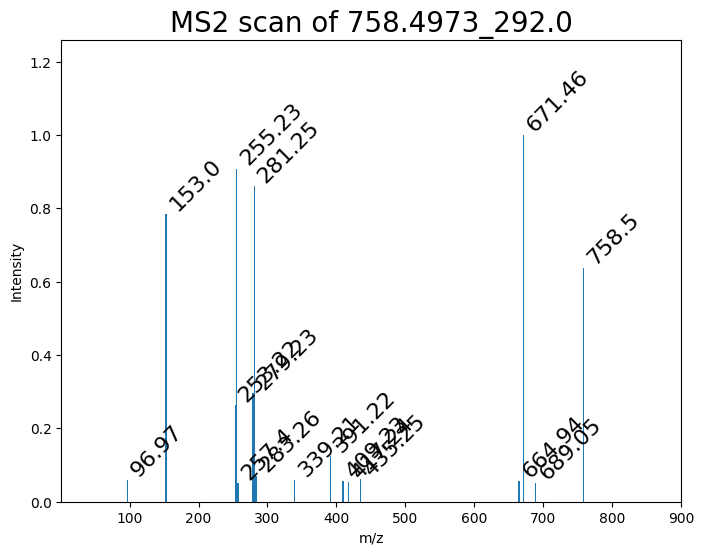

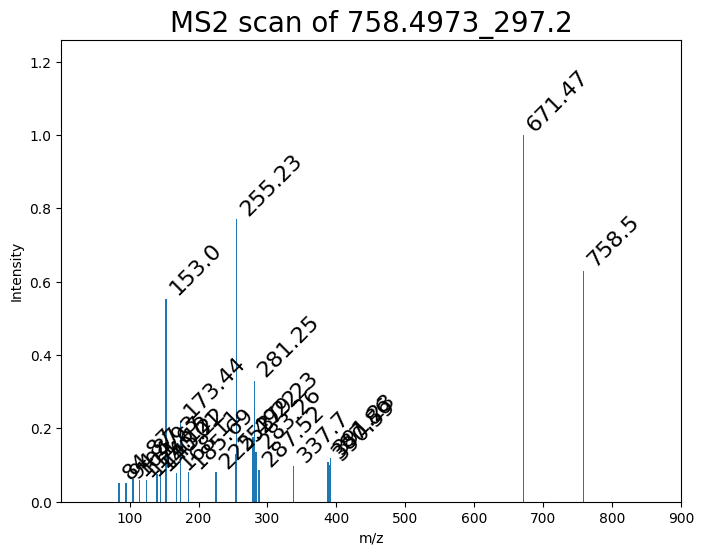

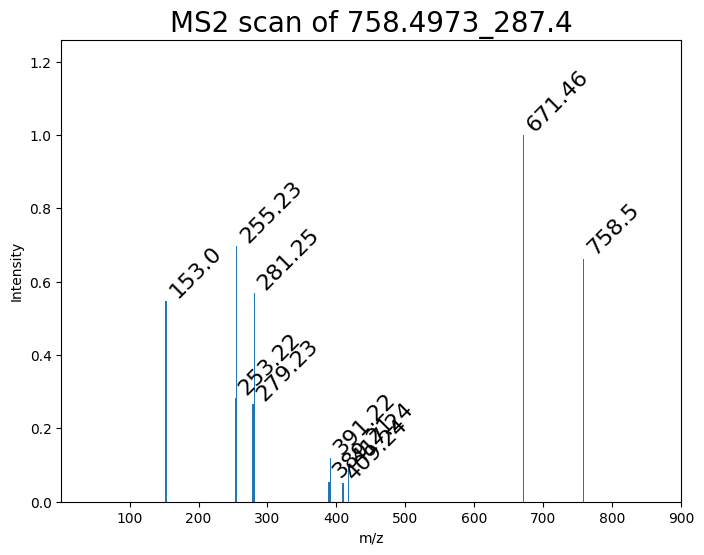

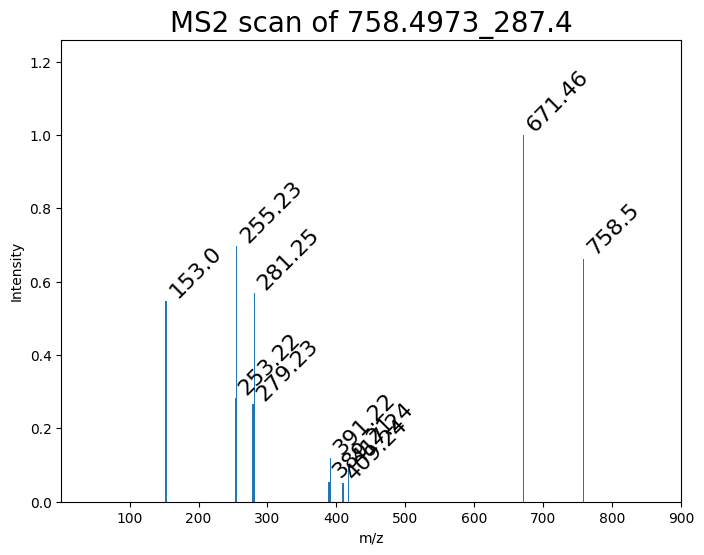

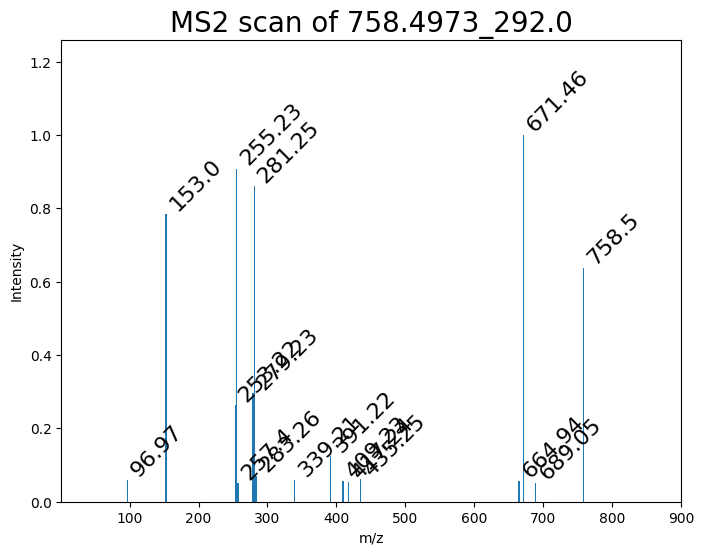

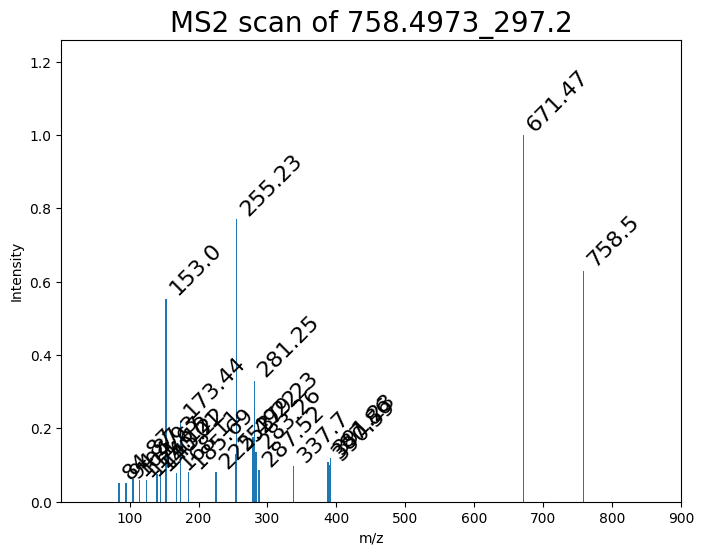

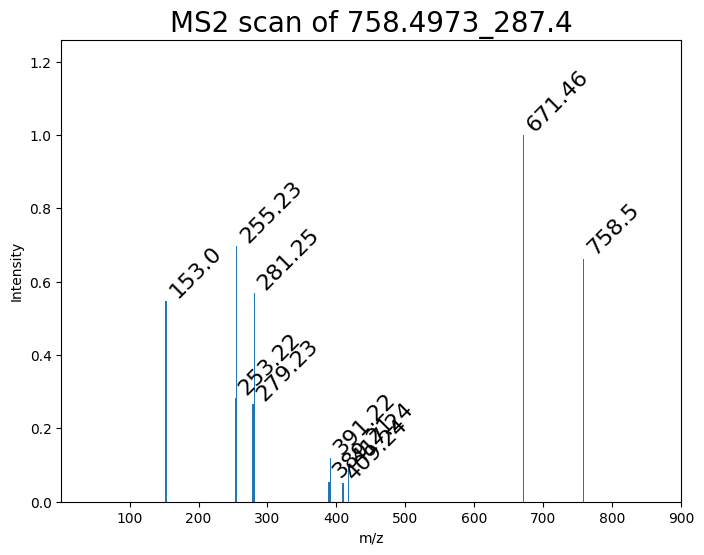

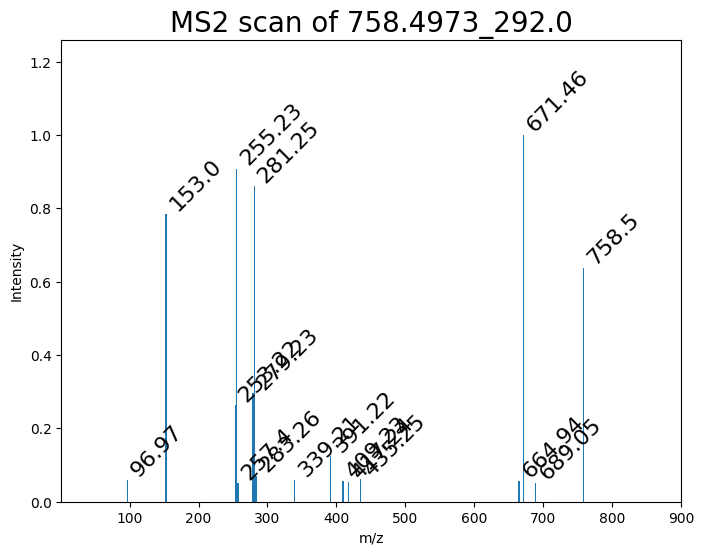

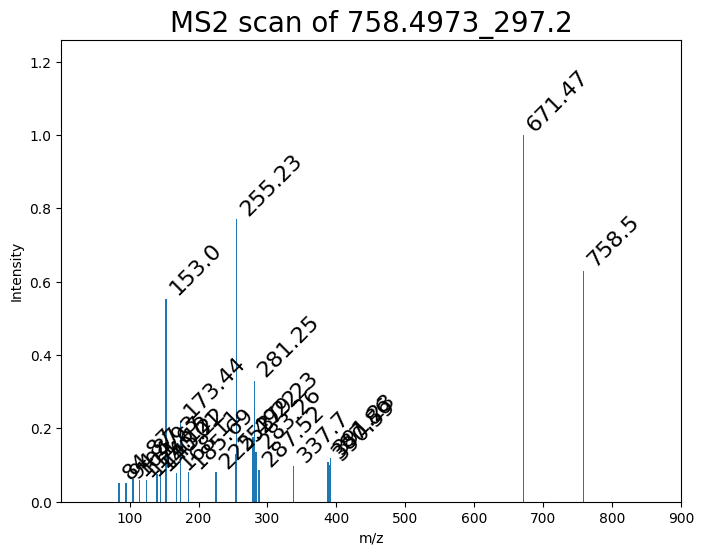

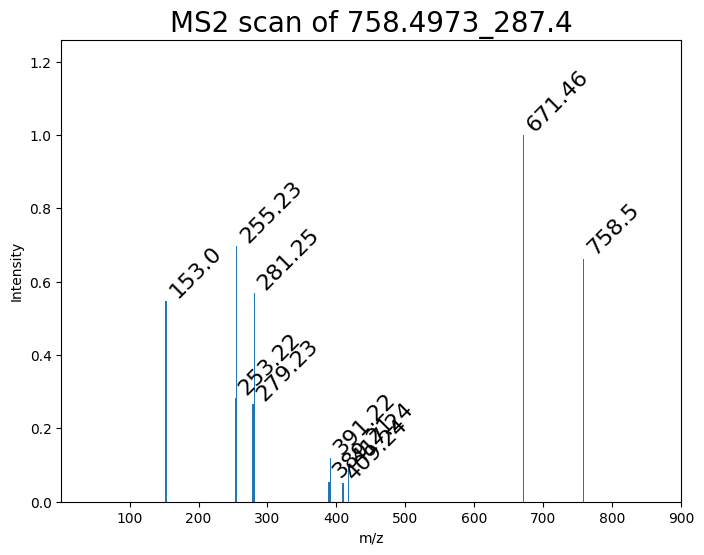

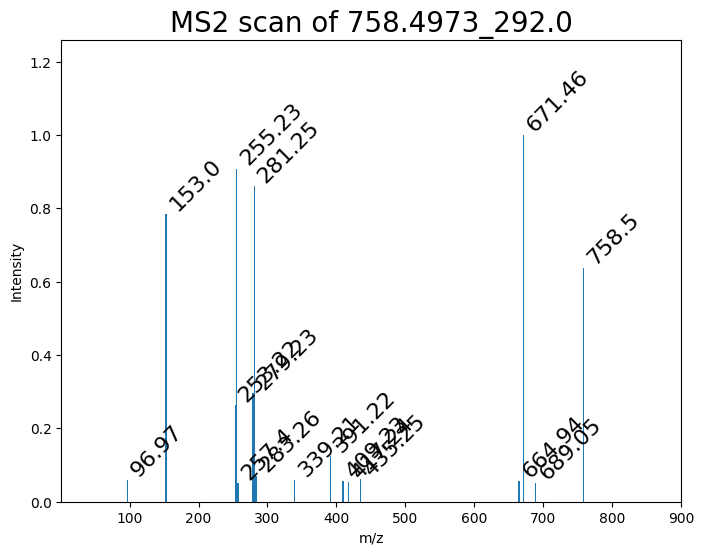

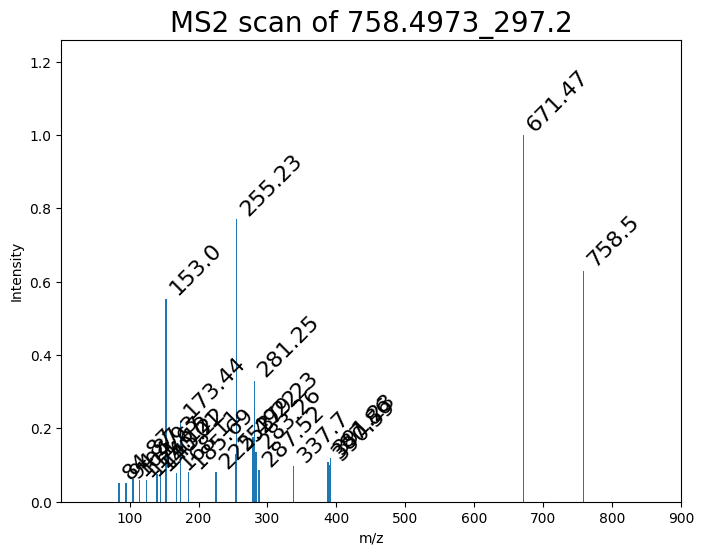

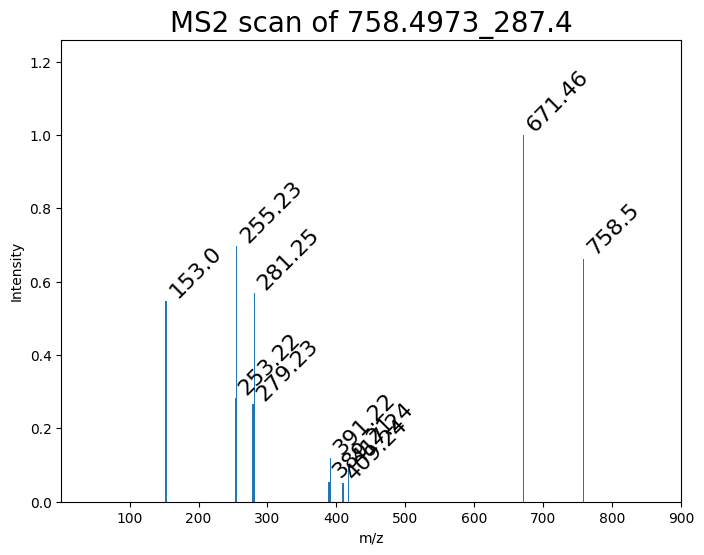

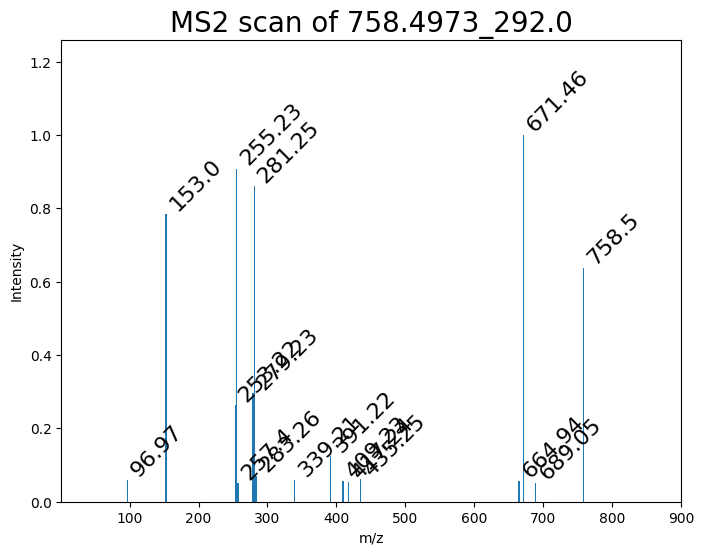

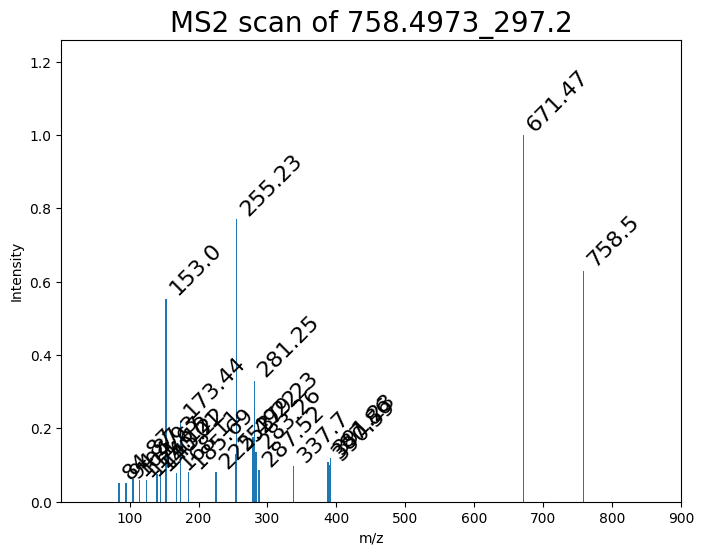

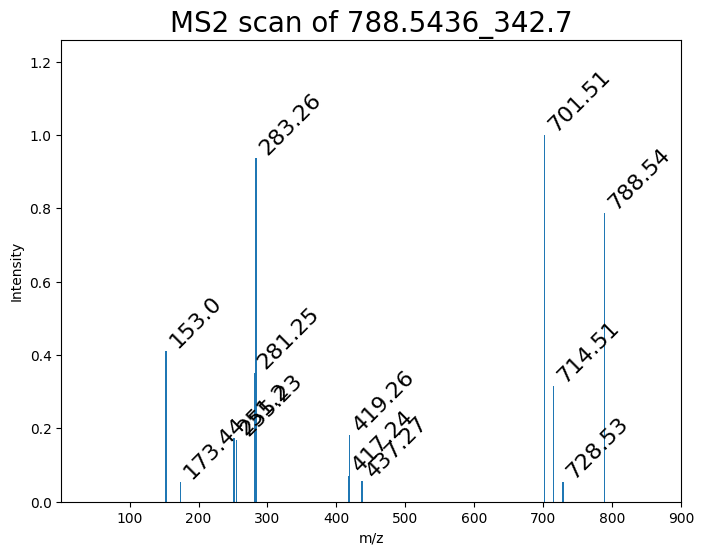

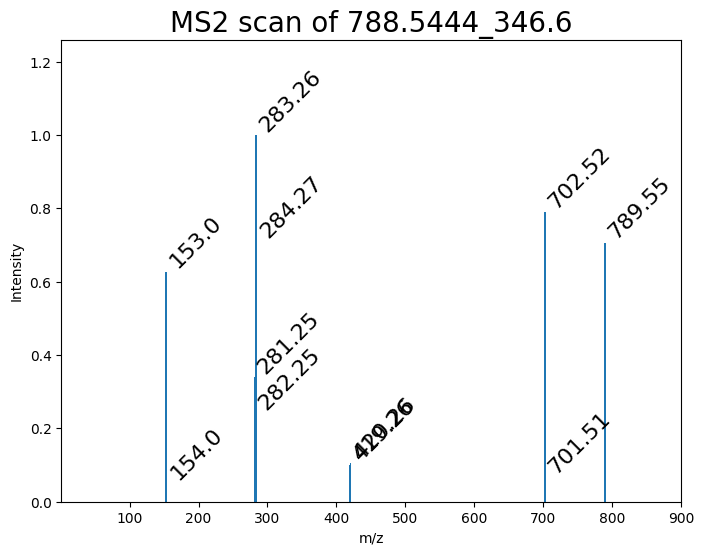

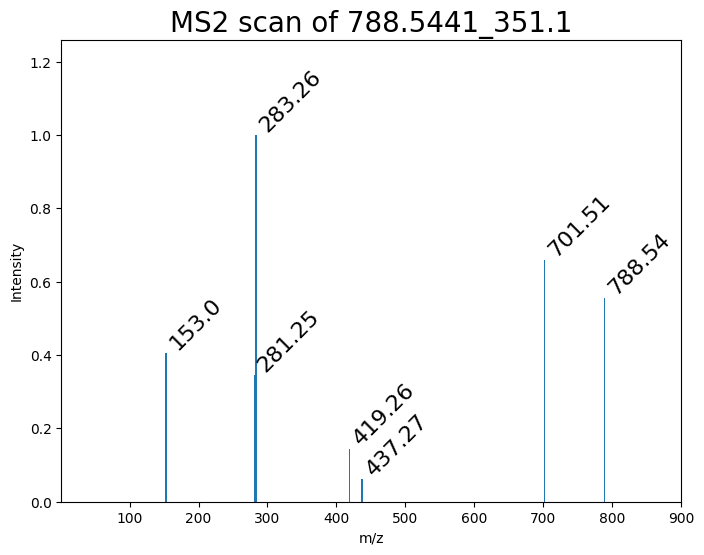

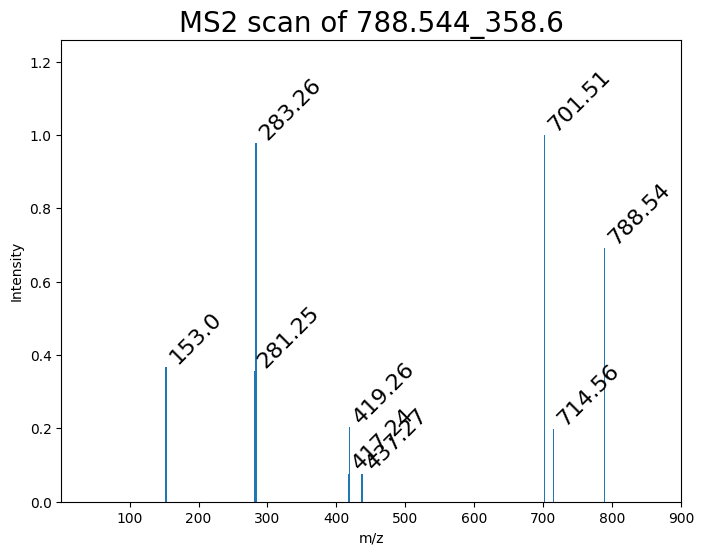

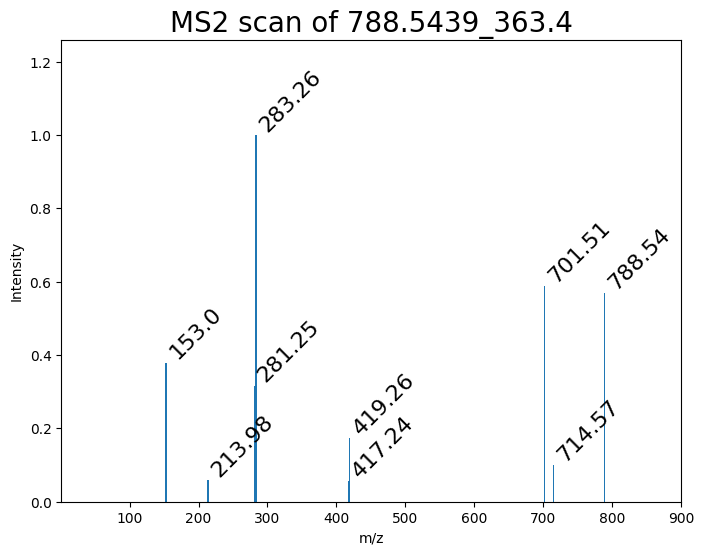

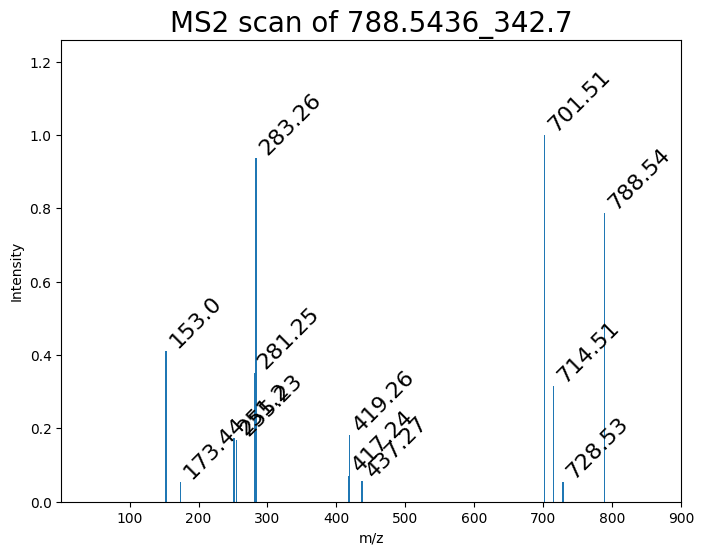

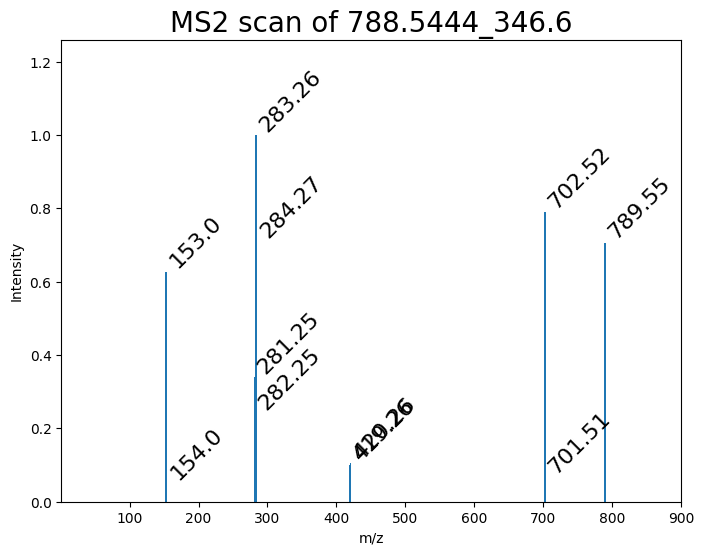

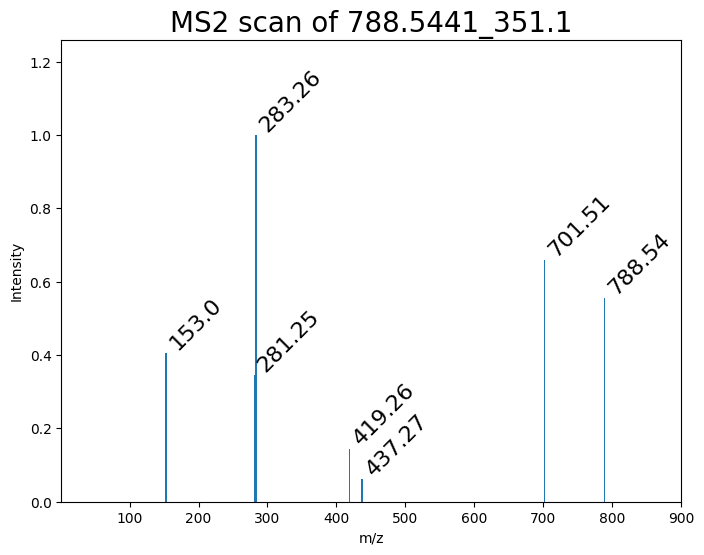

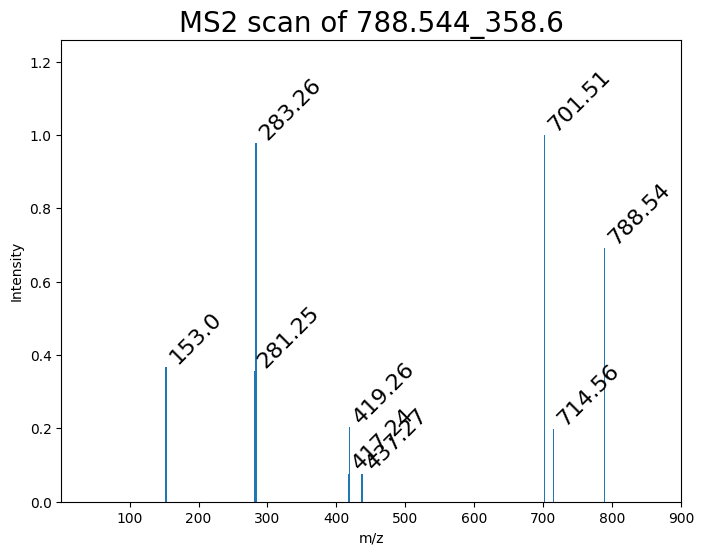

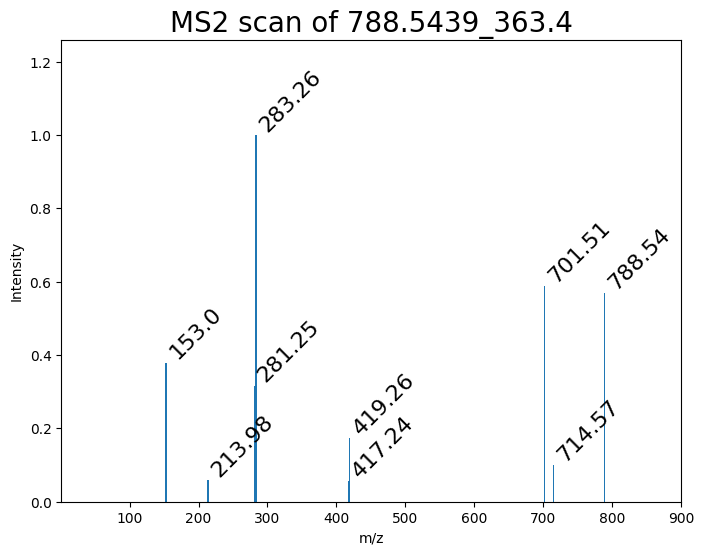

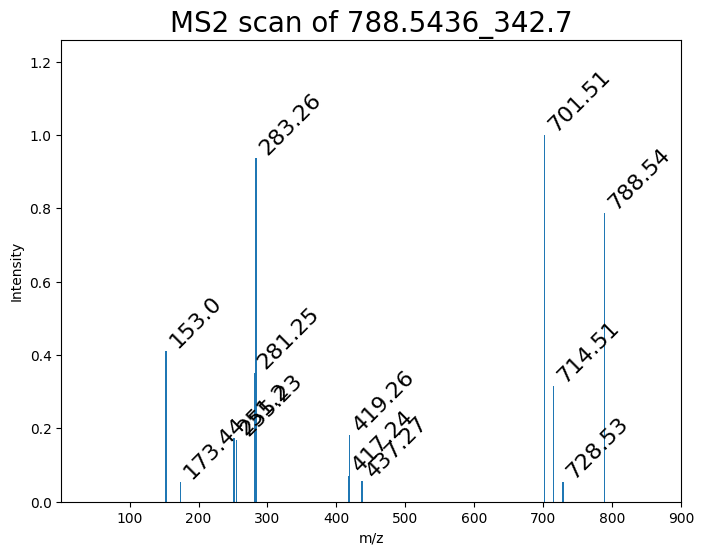

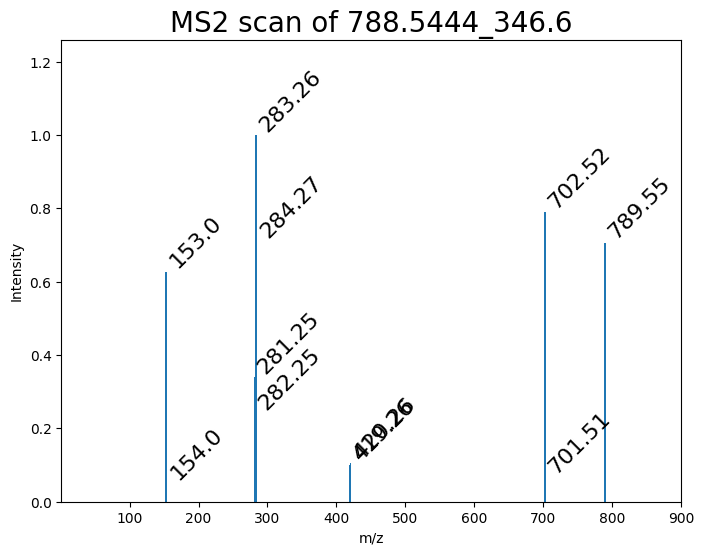

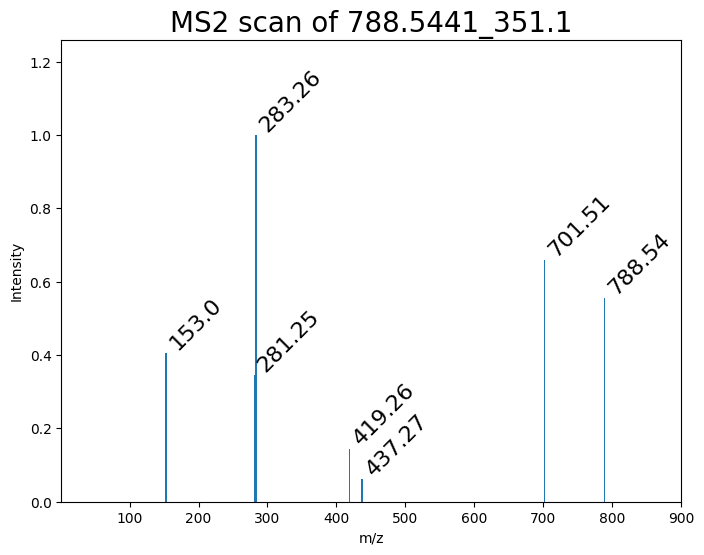

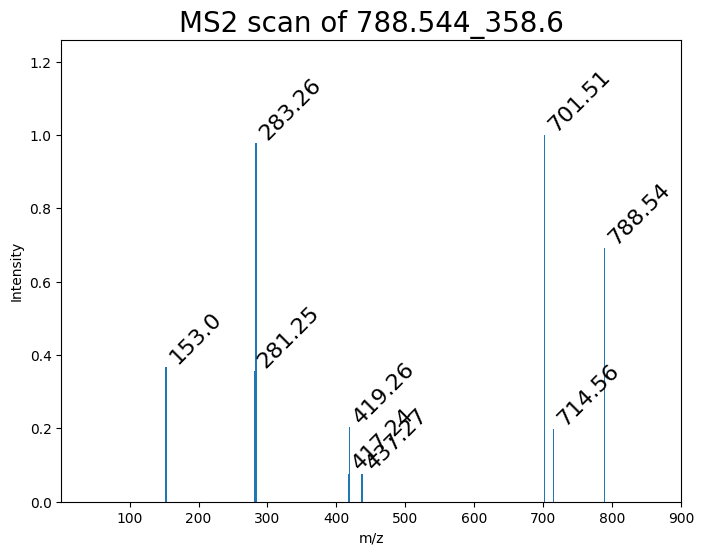

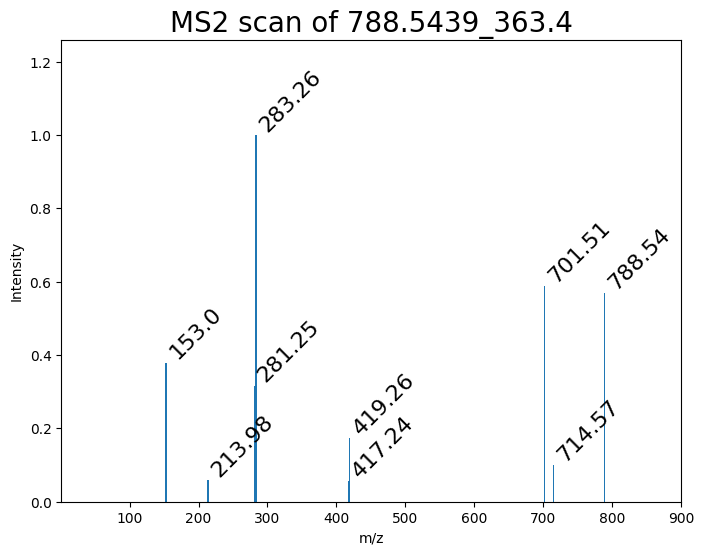

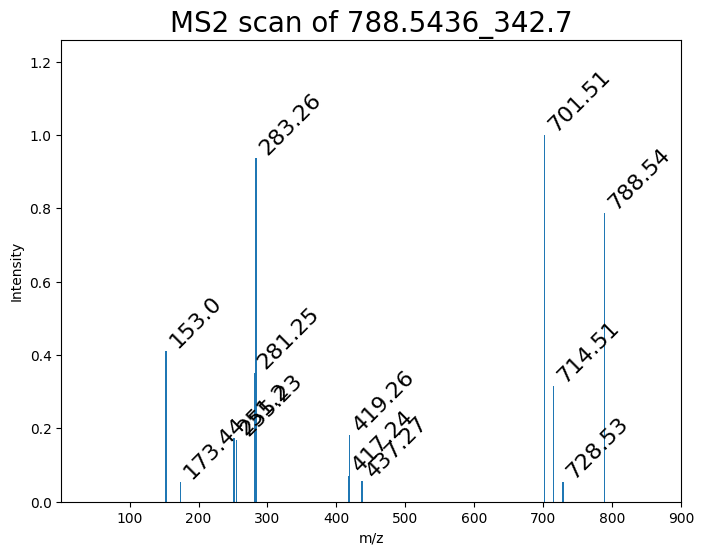

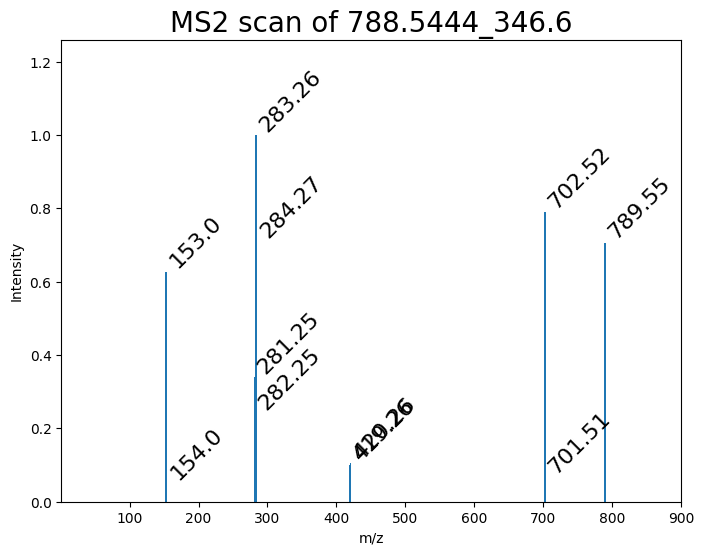

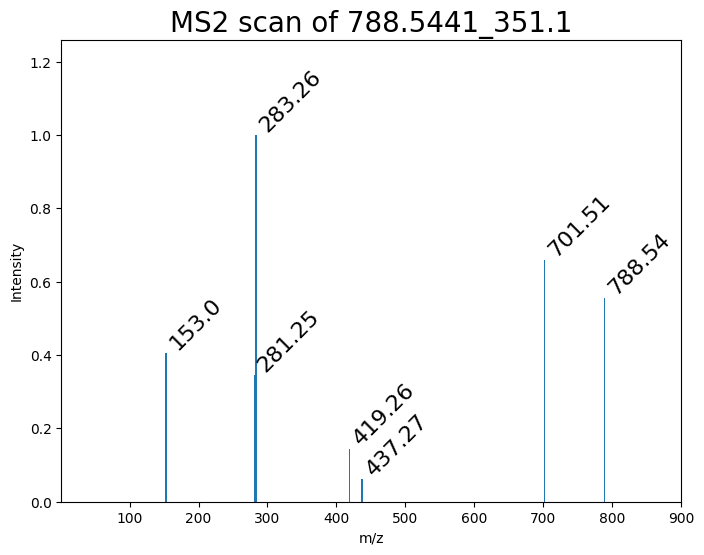

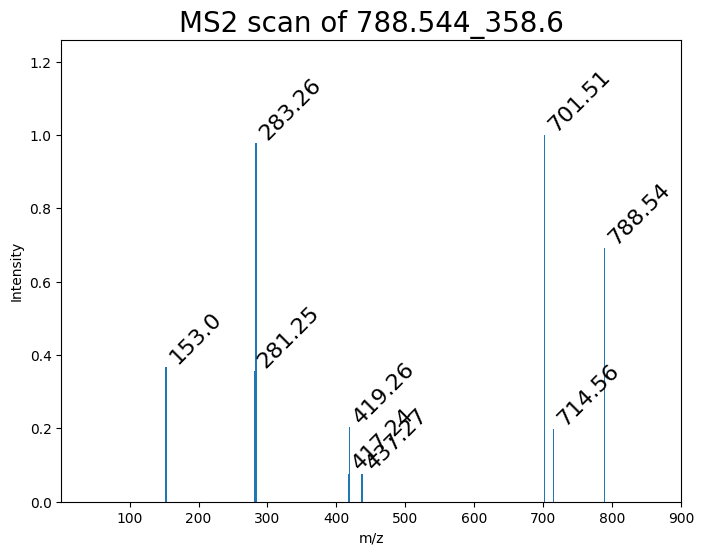

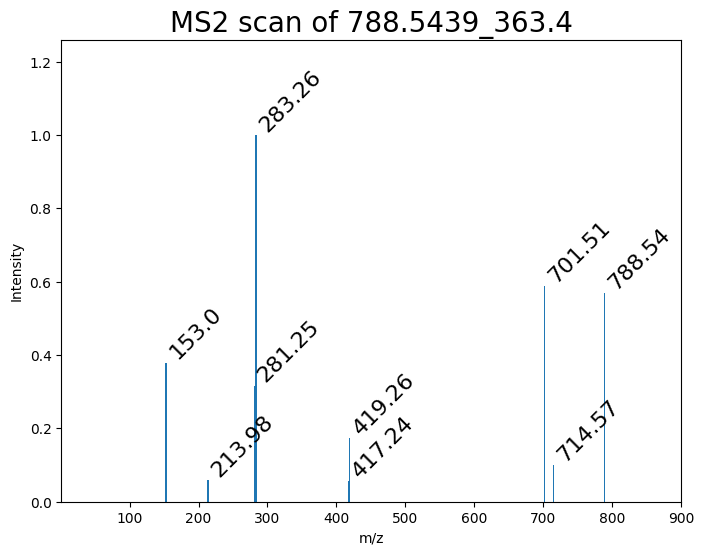

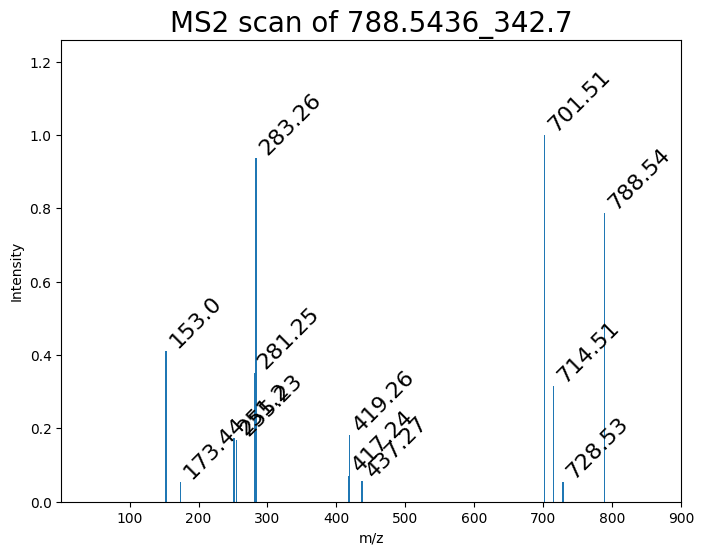

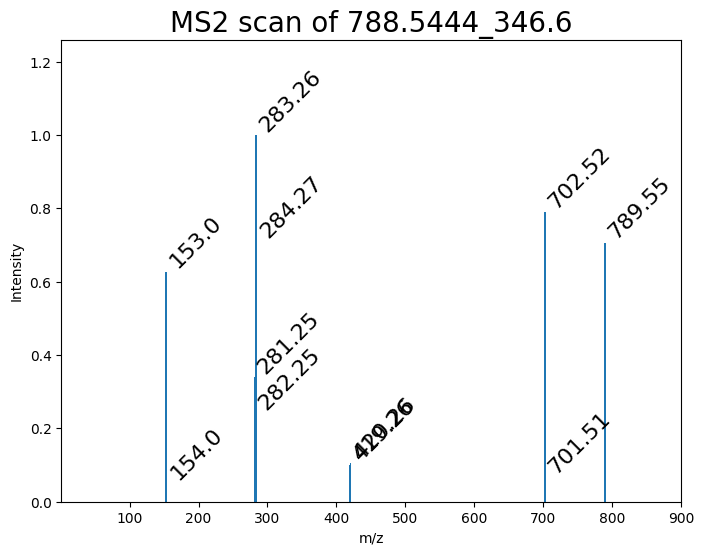

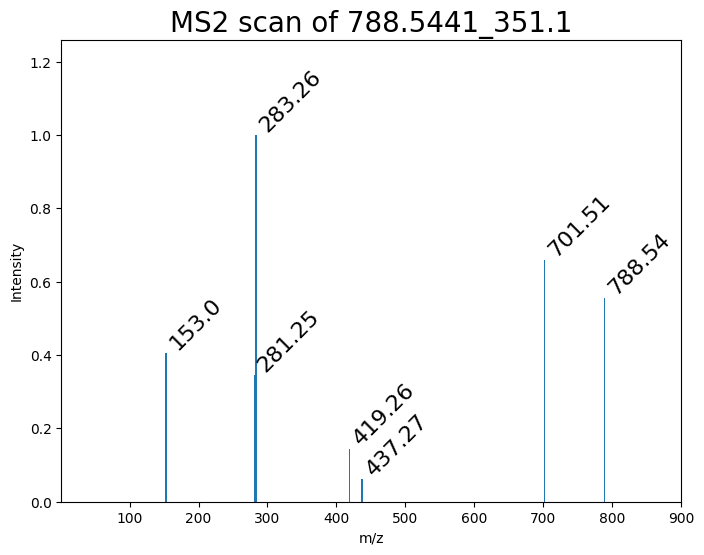

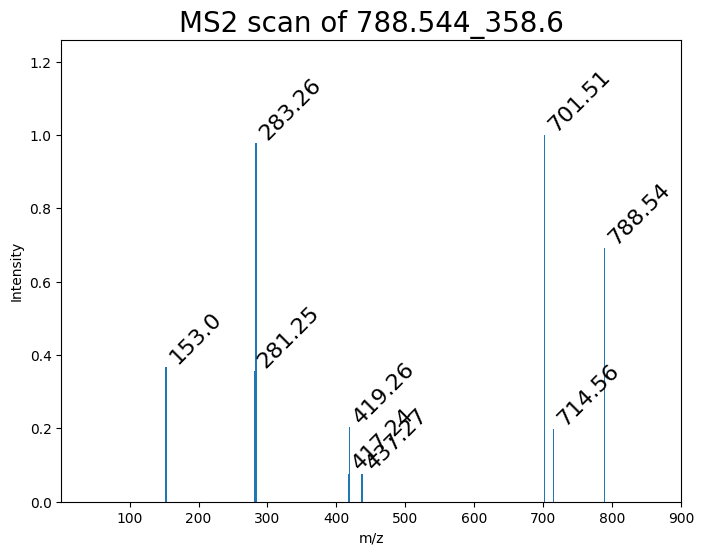

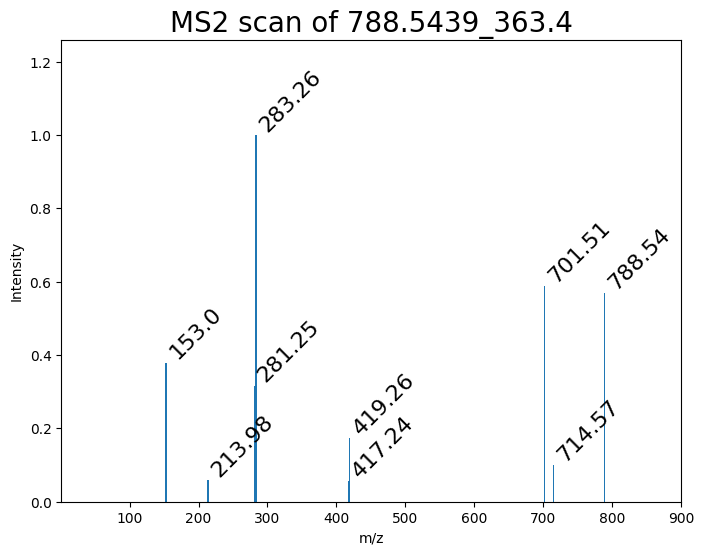

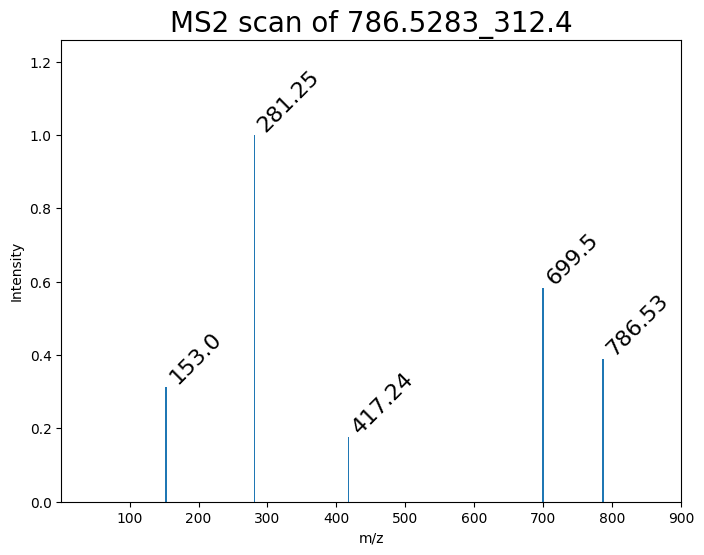

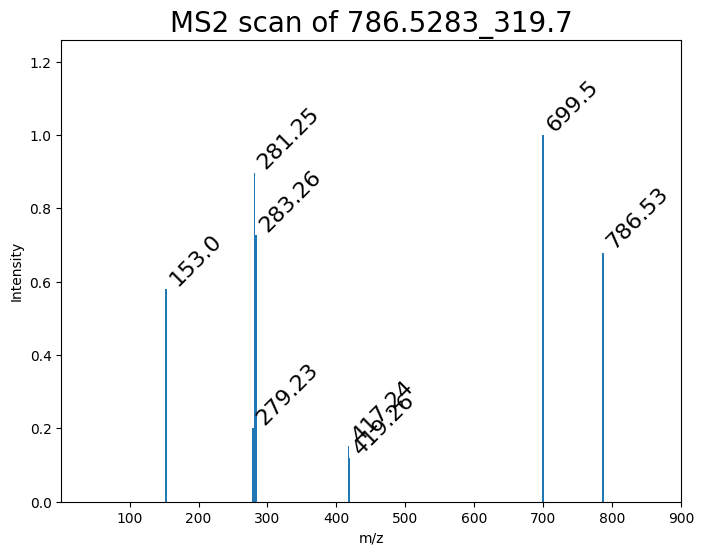

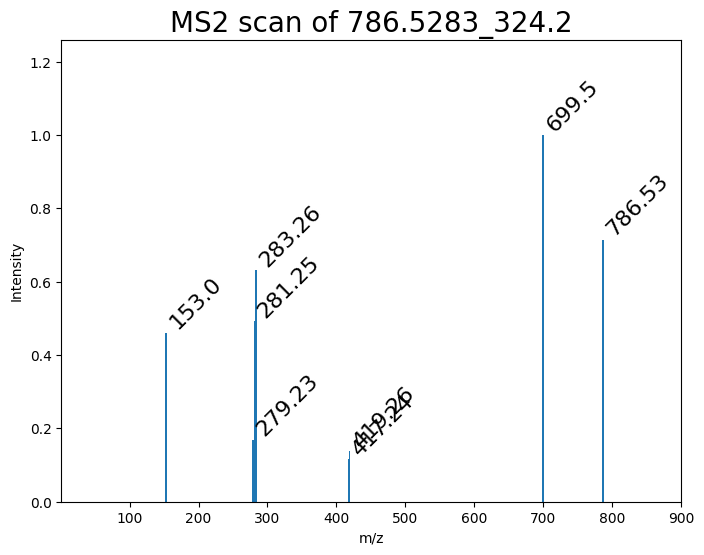

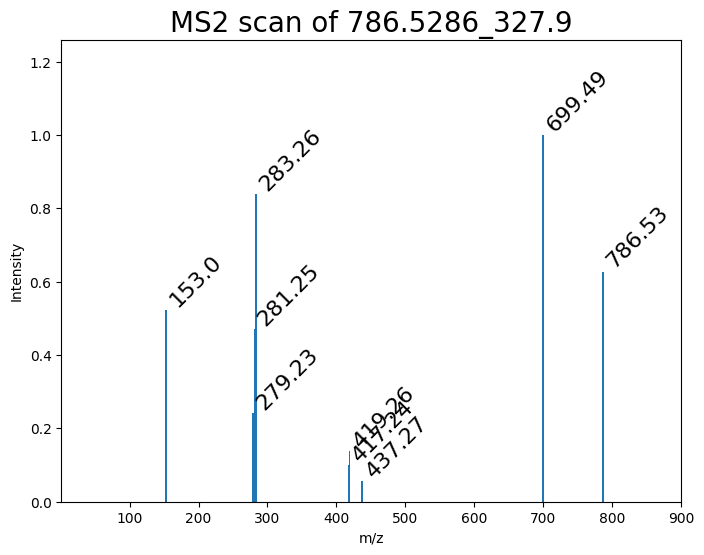

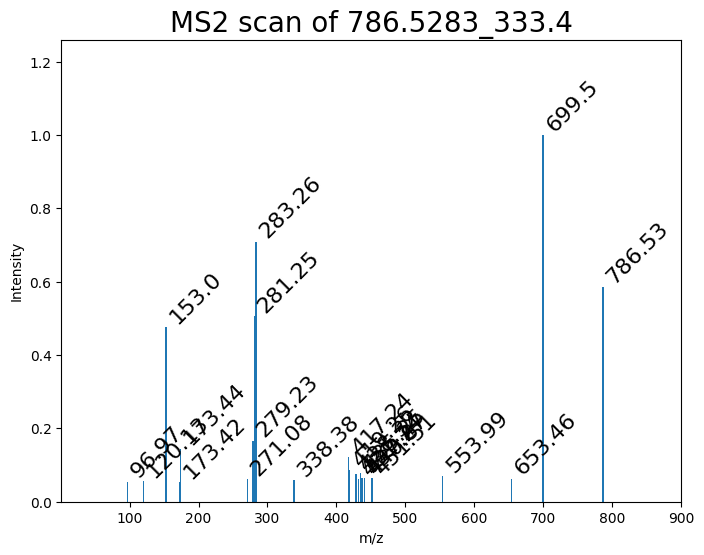

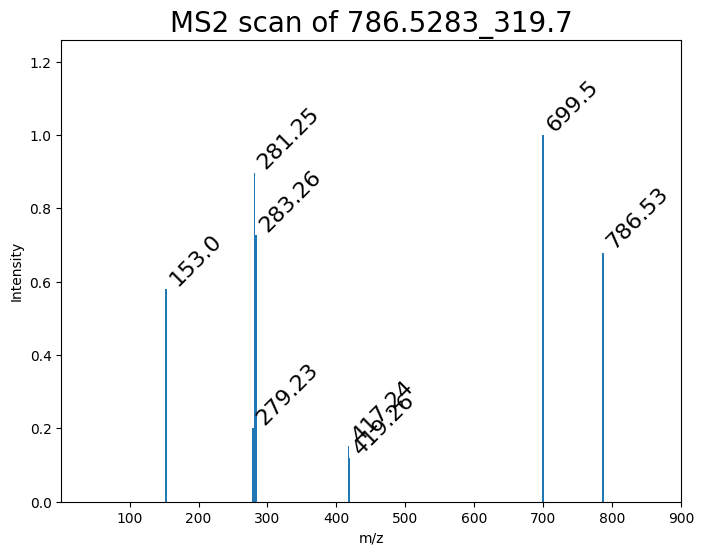

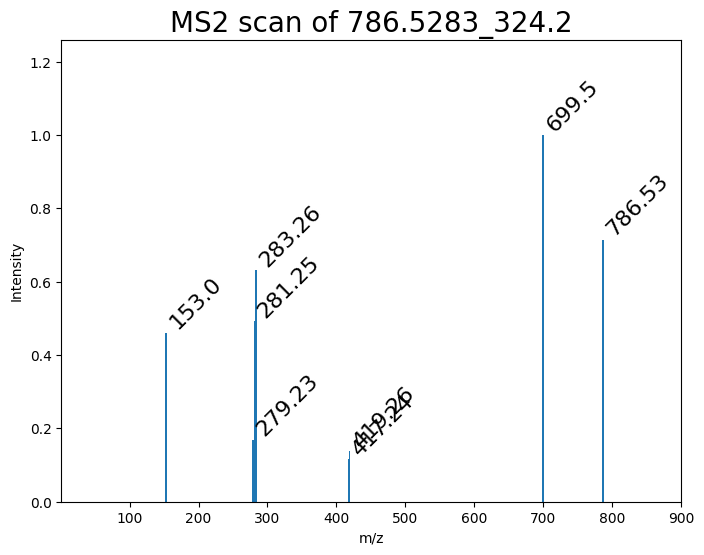

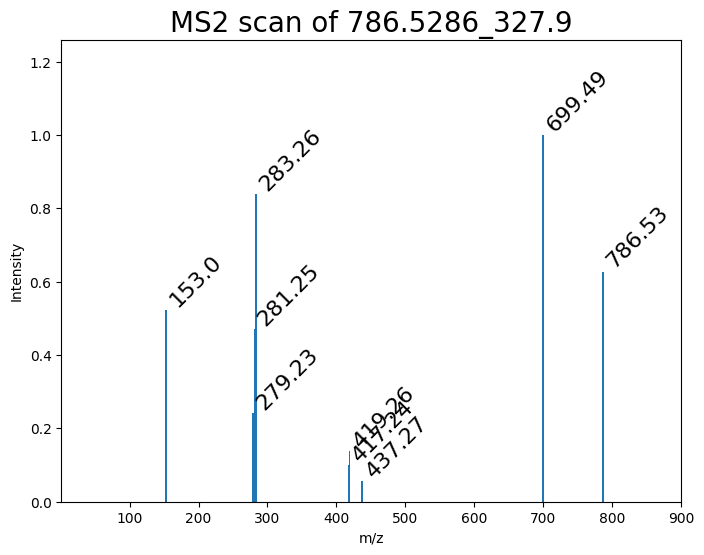

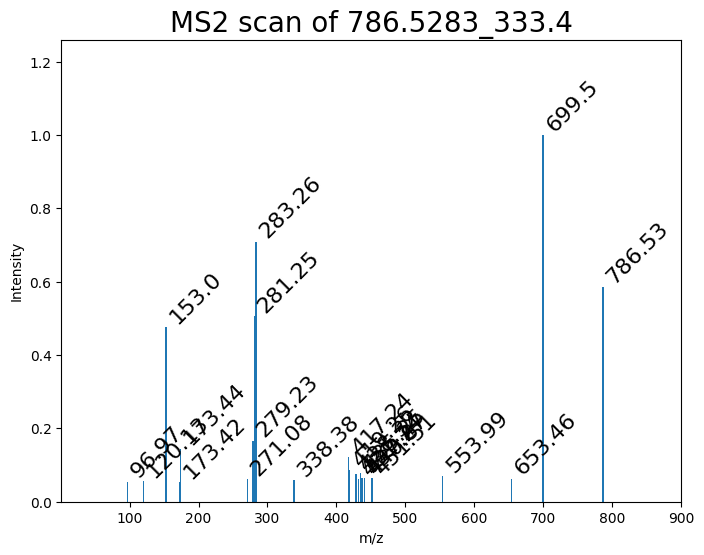

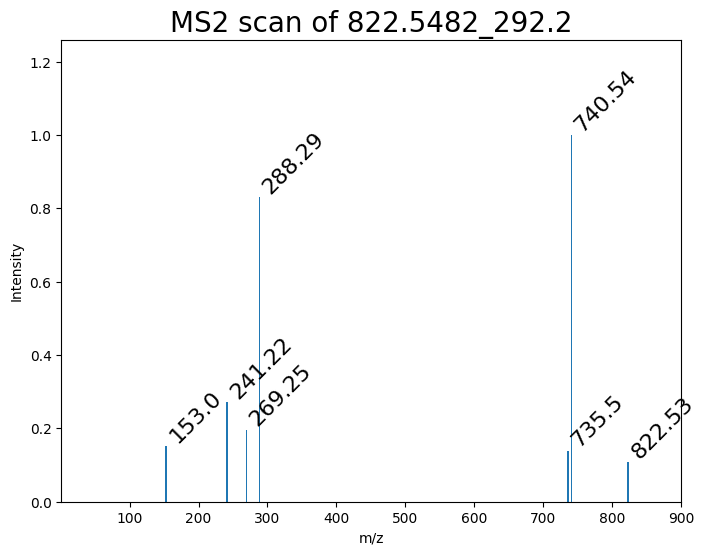

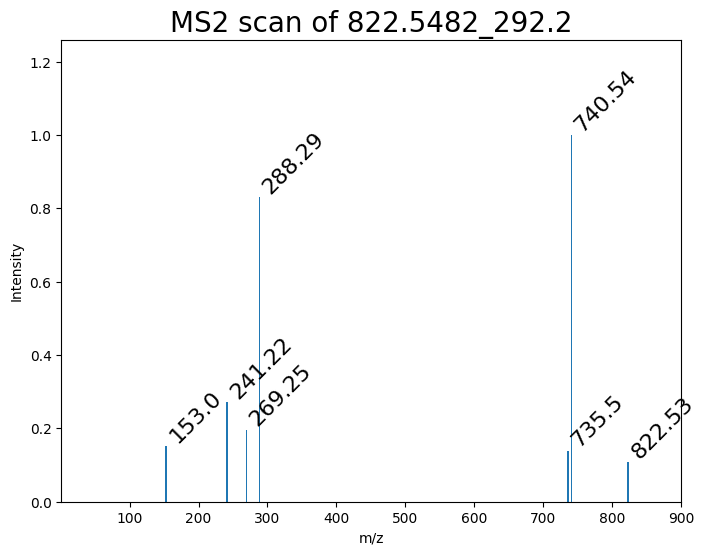

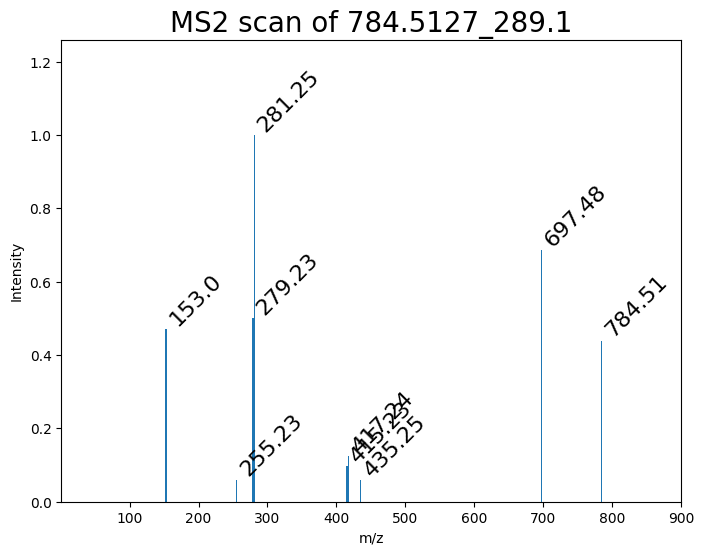

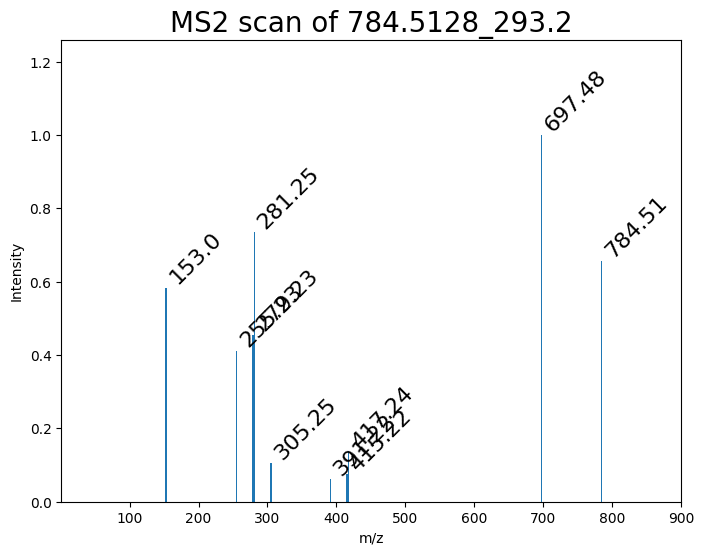

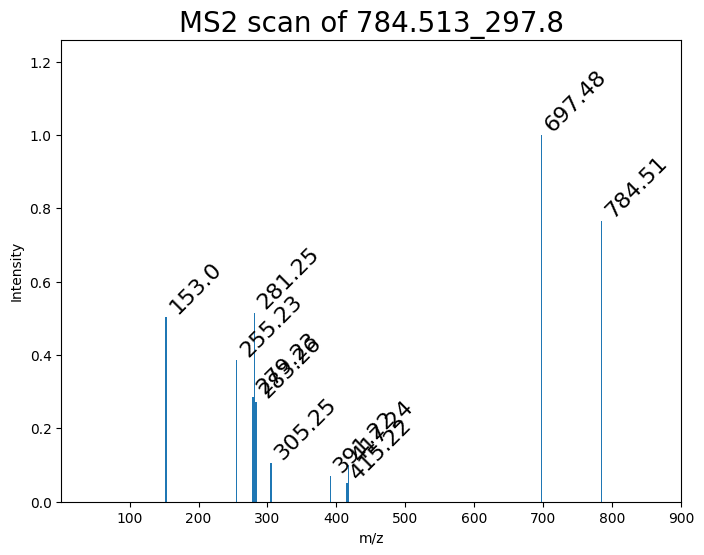

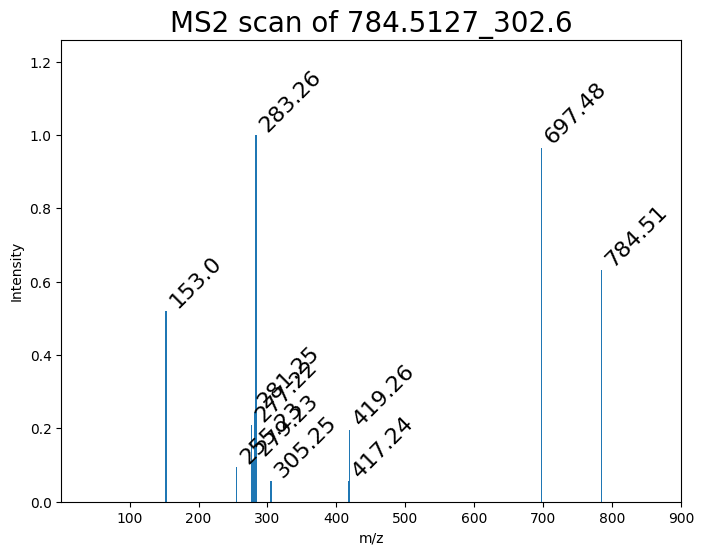

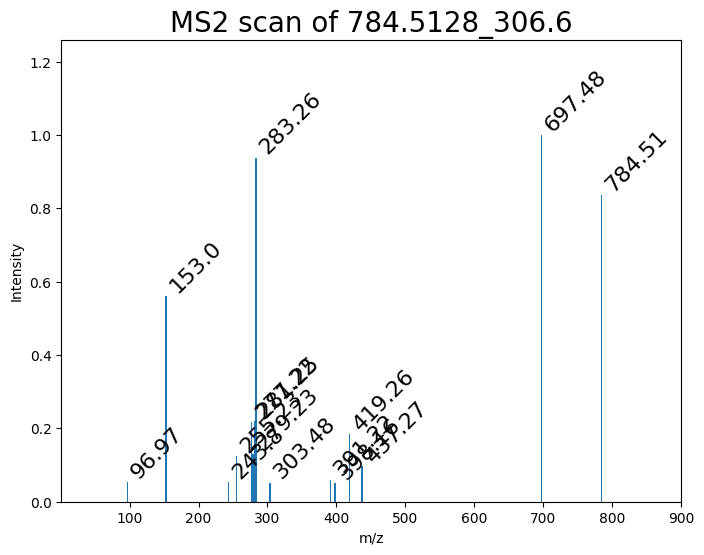

In [33]:
for FTID in NL_res_dict_clean.keys():
    plot_spectra(spectra = NL_res_dict_clean[FTID], 
                 save_figure=True,
                 output_path=f"./data/output_benchmark_wt_iPSC/{FTID}_{df_sel.loc[FTID,'short_name']}/",
                 label = f"{FTID}_{df_sel.loc[FTID,'short_name']}"
                 )